In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [117]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

# Examining Data

In [118]:
df= pd.read_csv("train.csv") # reading the train.csv data

In [119]:
df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


## Short description about features

**ID** Represents a unique identification of an entry

**Customer_ID** Represents a unique identification of a person

**Month** Represents the month of the year

**Name** Represents the name of a person

**Age** Represents the age of the person

**SSN** Represents the social security number of a person

**Occupation** Represents the occupation of the person

**Annual_Income** Represents the annual income of the person

**Monthly_Inhand_Salary** Represents the monthly base salary of a person

**Num_Bank_Accounts** Represents the number of bank accounts a person holds

**Num_Credit_Card** Represents the number of other credit cards held by a person

**Interest_Rate Represents** the interest rate on credit card

**Num_of_Loan** Represents the number of loans taken from the bank

**Type_of_Loan** Represents the types of loan taken by a person

**Delay_from_due_date** Represents the average number of days delayed from the payment date

**Num_of_Delayed_Payment** Represents the average number of payments delayed by a person

**Changed_Credit_Limit** Represents the percentage change in credit card limit

**Num_Credit_Inquiries** Represents the number of credit card inquiries

**Credit_Mix** Represents the classification of the mix of credits

**Outstanding_Debt** Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio** Represents the utilization ratio of credit card

**Credit_History_Age** Represents the age of credit history of the person

**Payment_of_Min_Amount** Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month** Represents the monthly EMI payments (in USD)

**Amount_invested_monthly** Represents the monthly amount invested by the customer (in USD)

**Payment_Behaviour Represents** the payment behavior of the customer (in USD)

**Monthly_Balance** Represents the monthly balance amount of the customer (in USD)

**Credit_Score** Represents the bracket of credit score (Poor, Standard, Good)

In [120]:
# Creating a copy from df named df_copy

df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [121]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [122]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [123]:
df.sample(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11568,0x59ca,CUS_0xc63a,January,Levinea,20,801-06-2006,Accountant,18438.875,1465.572917,0,4,10,1,Not Specified,6,11,5.08,0.0,_,435.96,39.473710,NaN,No,15.346029,123.44728416272957,Low_spent_Medium_value_payments,287.76397821425275,Poor
76185,0x1d467,CUS_0x63b4,February,Samn,32,674-76-4745,Teacher,117355.48_,NaN,4,7,2,1,Credit-Builder Loan,8,1,0.72,3.0,_,1484.67,28.157197,26 Years and 2 Months,No,67.673425,253.20343087326177,High_spent_Large_value_payments,894.8854777093782,Standard
76365,0x1d573,CUS_0x6bc3,June,ill Trottx,23,266-04-7936,Engineer,88905.0,7199.750000,6,7,11,2,"Debt Consolidation Loan, and Mortgage Loan",12,12,0.58,3.0,Standard,971.83,31.785133,31 Years and 4 Months,Yes,132.552578,126.46126283388935,High_spent_Medium_value_payments,710.9611589016499,Standard
74397,0x1c9eb,CUS_0x6525,June,Palmerw,28,734-19-2330,Manager,28431.46,2378.288333,7,5,18,5,"Not Specified, Home Equity Loan, Mortgage Loan...",32,23,2.64,13.0,Bad,2152.83,32.184931,8 Years and 10 Months,Yes,111.227029,67.98509485835278,High_spent_Medium_value_payments,308.6167092622605,Standard
22952,0x9c7e,CUS_0x43f1,January,Freifeldv,53,222-18-8106,Teacher,62347.86,NaN,8,7,7,0,NaN,16,9,6.78,0.0,Standard,681.95,31.407071,23 Years and 3 Months,No,0.000000,226.9968053022066,Low_spent_Large_value_payments,544.6686946977934,Standard
51235,0x14235,CUS_0x8da8,April,Dianep,28,028-05-9742,Developer,10037.855,849.487917,4,5,17,4_,"Mortgage Loan, Home Equity Loan, Credit-Builde...",6,18,13.99,7.0,Standard,1665.09,25.091465,10 Years and 1 Months,Yes,20.690956,16.042397903582614,!@9#%8,288.21543785136123,Standard
70505,0x1b31f,CUS_0x9ebf,February,Hepheri,22,770-43-4626,Manager,131723.24,10841.936667,4,3,5,4,"Mortgage Loan, Home Equity Loan, Payday Loan, ...",8,12,9.66,0.0,Good,642.11,27.213139,30 Years and 3 Months,No,385.971751,326.7893740212068,High_spent_Medium_value_payments,621.4325411509808,Standard
91831,0x23011,CUS_0x9d9,August,Hilary Russs,43,509-62-5624,Musician,108312.64,9060.053333,4,3,7,2,"Payday Loan, and Credit-Builder Loan",5,18,11.8,NaN,Good,787.15,40.626495,32 Years and 0 Months,No,169.599198,118.34259773134609,High_spent_Large_value_payments,858.0635380892262,Poor
57980,0x169ba,CUS_0x438a,May,Helen Popperm,41,081-12-2607,Architect,34076.32,3017.693333,9,7,25,5,"Home Equity Loan, Debt Consolidation Loan, Stu...",47,1852,5.79,8.0,Bad,1405.98,31.412892,19 Years and 11 Months,NM,134.403390,372.59274710350974,Low_spent_Small_value_payments,84.77319645449782,Poor
97426,0x250dc,CUS_0xa36d,March,Michelex,37,397-71-3346,Scientist,10127.625,872.968750,10,8,32,8,"Credit-Builder Loan, Student Loan, Auto Loan, ...",23,16,9.25,9.0,_,4673.99,29.453236,8 Years and 10 Months,Yes,39.103705,__10000__,High_spent_Medium_value_payments,288.89588187205214,Poor


## Checking the summary information of df

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [125]:
# Checking the null values of df

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [126]:
# Checking the duplicated values in df

df.duplicated().sum()

0

In [127]:
# Checking the number of uniques in df

df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

## Defining a function to check null values, number of uniques and value counts for each feature

In [139]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print("Value_counts :\n",df[col].value_counts(dropna = False))
    print("##"*20)
    print()

In [140]:
# Checking the informations for each column using defined function first_look

for col in df.columns :
    first_look(col)

column name :  ID
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  100000
Value_counts :
 0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
########################################

column name :  Customer_ID
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  12500
Value_counts :
 CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
########################################

column name :  Month
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  8
Value_counts :
 January     12500
February    12500
March       12500
April       1

Number_of_Nulls   :  0
Number_of_Uniques :  12203
Value_counts :
 1109.03    24
1151.7     24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64
########################################

column name :  Credit_Utilization_Ratio
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  100000
Value_counts :
 26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64
########################################

column name :  Credit_History_Age
--------------------------------
Percent_of_Nulls   :  % 9.03
Number_of_Nulls   :  9030
Number_of_Uniques :  404
Value_counts :
 NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months    

# Cleaning Data

There are so many strange values that should be cleaned or replaced with np.nan .

In [133]:
# defining a function to replace "_", "_______", "#F%$D@*&8", "!@9#%8", "__-333333333333333333333333333__" with np.nan

def clean_data(row) :
    if row in ["_", "_______", "#F%$D@*&8", "!@9#%8", "__-333333333333333333333333333__"]:
        return np.nan
    else :
        return row


In [134]:
# replacing the strange values with np.nan using defined function

for col in df.columns :
    df[col] = df[col].apply(clean_data)

In [135]:
# Strip "_" character at the begin and end of df features

for col in df.columns :
    if df[col].dtype == "O" :
        if df[col].str.contains("_").sum() > 0:
            df[col] = df[col].str.strip("_")

In [145]:
# Convert ID numbers which are given as hexadecimal to decimal

df["ID"] = df.ID.apply(lambda x : int(x, 16))

In [148]:
# Convert Customer_ID numbers which are given as hexadecimal to decimal after stripping "CUS_"

df["Customer_ID"] = df.Customer_ID.str.strip("CUS_").apply(lambda x : int(x, 16))

In [149]:
# Checking the df after cleaning

for col in df.columns :
    first_look(col)

column name :  ID
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  100000
Value_counts :
 5634      1
105608    1
105642    1
105637    1
105636    1
         ..
55629     1
55628     1
55627     1
55626     1
155629    1
Name: ID, Length: 100000, dtype: int64
########################################

column name :  Customer_ID
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  12500
Value_counts :
 3392     8
39924    8
23267    8
48794    8
18548    8
        ..
11956    8
30819    8
40329    8
49221    8
37932    8
Name: Customer_ID, Length: 12500, dtype: int64
########################################

column name :  Month
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  8
Value_counts :
 January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August 

Number_of_Uniques :  3
Value_counts :
 Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
########################################

column name :  Total_EMI_per_month
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  14950
Value_counts :
 0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64
########################################

column name :  Amount_invested_monthly
--------------------------------
Percent_of_Nulls   :  % 4.48
Number_of_Nulls   :  4479
Number_of_Uniques :  91049
Value_counts :
 NaN                   4479
10000                 4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
                      ... 
36.54

# Fixing Data Type

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int32  
 1   Customer_ID               100000 non-null  int32  
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [162]:
col_int = ["ID", "Customer_ID", "Age", "Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan", "Delay_from_due_date"]

col_float = ["Num_of_Delayed_Payment", "Annual_Income", "Interest_Rate", "Changed_Credit_Limit","Outstanding_Debt",\
             "Amount_invested_monthly","Monthly_Balance"]


In [163]:
for col in col_int :
    df[col] = df[col].astype(int)

In [165]:
for col in col_float :
    df[col] = df[col].astype(float)

# Handling With Missing Values

In [21]:
# Name

df_train["Name"]= df_train.groupby("Customer_ID")["Name"].fillna(method='bfill').fillna(method='ffill')

In [22]:
(df_train.groupby("Customer_ID")["Name"].value_counts(dropna=False) != 8).sum()

0

In [23]:
df_train.head(60)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [24]:
# Age
df_train.Age.value_counts(dropna=False).sample(20)

381      1
4944     1
1051     1
7980     1
5165     1
1172     1
6043     1
4782     1
54_     75
2350     1
993      1
3873     1
3200     1
6301     1
7768     1
7987     1
3413     1
2871     1
2419     2
528      2
Name: Age, dtype: int64

In [25]:
df_train["Age"] = df_train.Age.str.replace("_", "").astype(int)

In [26]:
df_train.Age.value_counts(dropna=False).sample(20)

4010    1
540     1
8149    1
6237    1
7750    1
2540    1
6409    1
5973    1
6452    1
126     1
2744    1
5994    1
6322    1
6032    1
7409    1
5602    1
5765    1
3625    1
3910    1
5738    1
Name: Age, dtype: int64

In [27]:
q1 = df_train.Age.quantile(0.25)
q3 = df_train.Age.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-3.0, 69.0)

In [28]:
(df_train.Age < 0).sum()

886

In [29]:
df_train.groupby("Customer_ID")["Age"].value_counts().head(50)

Customer_ID  Age  
CUS_0x1000    17      5
              18      3
CUS_0x1009    26      6
              25      2
CUS_0x100b    18      4
              19      4
CUS_0x1011    44      7
              43      1
CUS_0x1013    44      6
              43      2
CUS_0x1015    27      7
              4510    1
CUS_0x1018    15      8
CUS_0x1026    51      4
              52      4
CUS_0x102d    30      5
              31      3
CUS_0x102e    26      6
              25      2
CUS_0x1032    40      7
              1853    1
CUS_0x1037    44      5
              45      3
CUS_0x1038    27      6
              28      2
CUS_0x103e    40      8
CUS_0x1041    15      6
              14      2
CUS_0x1044    44      8
CUS_0x1048    27      6
              26      1
              1217    1
CUS_0x104a    37      5
             -500     2
              36      1
CUS_0x104e    50      8
CUS_0x104f    20      5
              19      2
              2074    1
CUS_0x1051    41      4
              42     

In [30]:
df_train["Age"] = df_train.Age.replace([df_train[(df_train.Age > upper) | (df_train.Age < 0)]["Age"]], [None])

In [31]:
df_train.Age.value_counts(dropna=False)

38.0    2994
28.0    2968
31.0    2955
26.0    2945
32.0    2884
36.0    2868
35.0    2866
25.0    2861
27.0    2859
39.0    2846
34.0    2837
44.0    2824
19.0    2793
22.0    2785
41.0    2785
NaN     2781
20.0    2744
37.0    2742
29.0    2735
43.0    2734
30.0    2727
21.0    2716
24.0    2714
23.0    2654
45.0    2642
40.0    2609
42.0    2577
33.0    2543
18.0    2385
46.0    1621
15.0    1574
17.0    1502
16.0    1455
48.0    1385
49.0    1375
55.0    1366
52.0    1356
53.0    1354
54.0    1311
51.0    1291
50.0    1273
47.0    1227
14.0    1175
56.0     362
Name: Age, dtype: int64

In [32]:
df_train["Age"] = df_train.groupby("Customer_ID")["Age"].fillna(method="bfill").fillna(method="ffill").astype(int)

In [33]:
df_train.groupby("Customer_ID")["Age"].value_counts(dropna=False).head(20)

Customer_ID  Age
CUS_0x1000   17     5
             18     3
CUS_0x1009   26     6
             25     2
CUS_0x100b   18     4
             19     4
CUS_0x1011   44     7
             43     1
CUS_0x1013   44     6
             43     2
CUS_0x1015   27     8
CUS_0x1018   15     8
CUS_0x1026   51     4
             52     4
CUS_0x102d   30     5
             31     3
CUS_0x102e   26     6
             25     2
CUS_0x1032   40     8
CUS_0x1037   44     5
Name: Age, dtype: int64

In [34]:
df_train[(df_train.Age > upper) | (df_train.Age < 0)]["Age"]

Series([], Name: Age, dtype: int32)

In [35]:
df_train[(df_train.Age > upper) & (df_train.Age <100)].index

Int64Index([], dtype='int64')

In [36]:
df_train[(df_train.Age > upper) & (df_train.Age <100)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [37]:
# SSN

df_train.groupby("Customer_ID")["SSN"].value_counts(dropna=False)

Customer_ID  SSN        
CUS_0x1000   913-74-1218    8
CUS_0x1009   063-67-6938    7
             #F%$D@*&8      1
CUS_0x100b   238-62-0395    7
             #F%$D@*&8      1
                           ..
CUS_0xff3    #F%$D@*&8      1
CUS_0xff4    655-05-7666    8
CUS_0xff6    541-92-8371    8
CUS_0xffc    226-86-7294    8
CUS_0xffd    832-88-8320    8
Name: SSN, Length: 17115, dtype: int64

In [38]:
df_train.SSN.value_counts(dropna=False)

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [39]:
df_train.SSN.replace(["#F%$D@*&8"], [None], inplace=True)

In [40]:
df_train.SSN.value_counts(dropna=False)

NaN            5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [41]:
df_train["SSN"] = df_train.groupby("Customer_ID")["SSN"].fillna(method="bfill").fillna(method="ffill")

In [42]:
(df_train.SSN.value_counts(dropna=False) != 8).sum()

0

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [44]:
# Annual_Income
df_train["Annual_Income"] =df_train.Annual_Income.str.replace("_","").astype(float)

In [45]:
(df_train.groupby("Customer_ID")["Annual_Income"].value_counts(dropna=False) != 8).sum()

1964

In [46]:
df_train.groupby("Customer_ID")["Annual_Income"].value_counts()[df_train.groupby("Customer_ID")["Annual_Income"].value_counts()!=8]

Customer_ID  Annual_Income
CUS_0x1018   61194.81         7
             17117486.00      1
CUS_0x1057   86617.16         7
             1105753.00       1
CUS_0x107e   75095.91         7
                             ..
CUS_0xf20    20189519.00      1
CUS_0xf55    78443.48         7
             20350298.00      1
CUS_0xfa4    15035.19         7
             7711339.00       1
Name: Annual_Income, Length: 1964, dtype: int64

In [47]:
df_train.groupby("Customer_ID")["Annual_Income"].agg(pd.Series.mode)

Customer_ID
CUS_0x1000     30625.940
CUS_0x1009     52312.680
CUS_0x100b    113781.390
CUS_0x1011     58918.470
CUS_0x1013     98620.980
                 ...    
CUS_0xff3      17032.785
CUS_0xff4      25546.260
CUS_0xff6     117639.920
CUS_0xffc      60877.170
CUS_0xffd      41398.440
Name: Annual_Income, Length: 12500, dtype: float64

In [48]:
df_train["Annual_Income"] = df_train.groupby("Customer_ID")["Annual_Income"].transform(lambda x : x.mode()[0])

In [49]:
# Monthly_Inhand_Salary

df_train.groupby("Customer_ID")["Monthly_Inhand_Salary"].value_counts(dropna=False).head(50)

Customer_ID  Monthly_Inhand_Salary
CUS_0x1000   2706.161667              7
             NaN                      1
CUS_0x1009   4250.390000              8
CUS_0x100b   9549.782500              7
             NaN                      1
CUS_0x1011   5208.872500              7
             NaN                      1
CUS_0x1013   7962.415000              5
             NaN                      3
CUS_0x1015   3725.585000              6
             NaN                      2
CUS_0x1018   5014.567500              6
             NaN                      2
CUS_0x1026   14463.856667             6
             NaN                      2
CUS_0x102d   7256.043333              8
CUS_0x102e   4197.953333              8
CUS_0x1032   5274.245000              8
CUS_0x1037   1086.423750              5
             NaN                      3
CUS_0x1038   10959.430000             5
             NaN                      3
CUS_0x103e   8262.233333              6
             NaN                      2
CUS_0

In [50]:
df_train["Monthly_Inhand_Salary"].isnull().sum()

15002

In [51]:
df_train["Monthly_Inhand_Salary"] = df_train.groupby("Customer_ID")["Monthly_Inhand_Salary"].fillna(method="bfill").fillna(method="ffill")

In [52]:
df_train["Monthly_Inhand_Salary"].isnull().sum()

0

In [53]:
df_train.groupby("Customer_ID")["Monthly_Inhand_Salary"].value_counts(dropna=False).head(50)

Customer_ID  Monthly_Inhand_Salary
CUS_0x1000   2706.161667              8
CUS_0x1009   4250.390000              8
CUS_0x100b   9549.782500              8
CUS_0x1011   5208.872500              8
CUS_0x1013   7962.415000              8
CUS_0x1015   3725.585000              8
CUS_0x1018   5014.567500              8
CUS_0x1026   14463.856667             8
CUS_0x102d   7256.043333              8
CUS_0x102e   4197.953333              8
CUS_0x1032   5274.245000              8
CUS_0x1037   1086.423750              8
CUS_0x1038   10959.430000             8
CUS_0x103e   8262.233333              8
CUS_0x1041   894.175833               8
CUS_0x1044   2748.799167              8
CUS_0x1048   3680.295000              8
CUS_0x104a   1461.449167              8
CUS_0x104e   1688.405833              8
CUS_0x104f   992.736250               8
CUS_0x1051   2859.518333              8
CUS_0x1056   1196.821667              8
CUS_0x1057   7250.096667              8
CUS_0x105b   2575.017500              5
     

In [54]:
# Num_Bank_Accounts

df_train.groupby("Customer_ID")["Num_Bank_Accounts"].value_counts(dropna=False).head(50)

Customer_ID  Num_Bank_Accounts
CUS_0x1000   6                    8
CUS_0x1009   6                    8
CUS_0x100b   1                    8
CUS_0x1011   3                    8
CUS_0x1013   3                    8
CUS_0x1015   7                    8
CUS_0x1018   7                    8
CUS_0x1026   2                    8
CUS_0x102d   5                    7
             1000                 1
CUS_0x102e   8                    8
CUS_0x1032   4                    8
CUS_0x1037   5                    8
CUS_0x1038   3                    8
CUS_0x103e   4                    8
CUS_0x1041   8                    8
CUS_0x1044   2                    8
CUS_0x1048   3                    8
CUS_0x104a   2                    7
             124                  1
CUS_0x104e   8                    8
CUS_0x104f   4                    8
CUS_0x1051   3                    8
CUS_0x1056   8                    8
CUS_0x1057   8                    8
CUS_0x105b   2                    8
CUS_0x105c   0                   

In [55]:
df_train.Num_Bank_Accounts.value_counts().head(50)

 6       13001
 7       12823
 8       12765
 4       12186
 5       12118
 3       11950
 9        5443
 10       5247
 1        4490
 0        4328
 2        4304
-1          21
 11          9
 803         7
 1668        5
 791         5
 105         5
 210         4
 1139        4
 1096        4
 1481        4
 1033        4
 857         4
 34          4
 312         4
 1257        4
 43          4
 170         3
 1478        3
 812         3
 903         3
 584         3
 610         3
 1065        3
 1577        3
 505         3
 882         3
 933         3
 809         3
 1124        3
 1089        3
 1747        3
 28          3
 179         3
 632         3
 1114        3
 786         3
 596         3
 137         3
 527         3
Name: Num_Bank_Accounts, dtype: int64

In [56]:
q1 = df_train.Num_Bank_Accounts.quantile(0.25)
q3 = df_train.Num_Bank_Accounts.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-3.0, 13.0)

In [57]:
df_train["Num_Bank_Accounts"] = df_train.Num_Bank_Accounts.replace([df_train.Num_Bank_Accounts[(df_train.Num_Bank_Accounts > upper) | (df_train.Num_Bank_Accounts < 0)]], [None])

In [58]:
df_train["Num_Bank_Accounts"]= df_train.groupby("Customer_ID")["Num_Bank_Accounts"].fillna(method="bfill").fillna(method="ffill").astype("int")

In [59]:
df_train["Num_Bank_Accounts"].isnull().sum()

0

In [60]:
df_train["Num_Bank_Accounts"]

0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 100000, dtype: int32

In [61]:
# Num_Credit_Card

df_train.groupby("Customer_ID")["Num_Credit_Card"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Card
CUS_0x1000   5                  8
CUS_0x1009   5                  8
CUS_0x100b   4                  8
CUS_0x1011   3                  8
CUS_0x1013   3                  8
CUS_0x1015   4                  8
CUS_0x1018   7                  8
CUS_0x1026   6                  8
CUS_0x102d   3                  8
CUS_0x102e   4                  8
CUS_0x1032   7                  8
CUS_0x1037   4                  8
CUS_0x1038   4                  8
CUS_0x103e   6                  8
CUS_0x1041   8                  8
CUS_0x1044   4                  8
CUS_0x1048   7                  8
CUS_0x104a   7                  7
             690                1
CUS_0x104e   4                  8
CUS_0x104f   6                  7
             1405               1
CUS_0x1051   5                  8
CUS_0x1056   6                  8
CUS_0x1057   4                  8
CUS_0x105b   4                  7
             1278               1
CUS_0x105c   4                  8
CUS_0x1063   5     

In [62]:
df_train["Num_Credit_Card"].value_counts(dropna=False).head(50)

5       18459
7       16615
6       16559
4       14030
3       13277
8        4956
10       4860
9        4643
2        2149
1        2132
11         36
0          13
849         8
852         7
183         6
106         6
1420        6
958         6
159         6
331         6
92          6
218         6
891         5
1223        5
180         5
399         5
1105        5
253         5
1217        5
1403        5
1323        5
1299        5
924         5
501         5
461         5
1391        5
147         5
1007        5
1130        5
579         5
157         5
104         5
25          5
870         5
298         4
970         4
698         4
43          4
1090        4
275         4
Name: Num_Credit_Card, dtype: int64

In [63]:
q1 = df_train.Num_Credit_Card.quantile(0.25)
q3 = df_train.Num_Credit_Card.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-0.5, 11.5)

In [64]:
df_train["Num_Credit_Card"] = df_train.Num_Credit_Card.replace([df_train.Num_Credit_Card[(df_train.Num_Credit_Card > upper) | (df_train.Num_Credit_Card < 0)]], [None])

In [65]:
df_train["Num_Credit_Card"] = df_train.groupby("Customer_ID")["Num_Credit_Card"].fillna(method="bfill").fillna(method="ffill").astype("int")

In [66]:
df_train["Num_Credit_Card"].isnull().sum()

0

In [67]:
df_train.groupby("Customer_ID")["Num_Credit_Card"].value_counts().head(50)

Customer_ID  Num_Credit_Card
CUS_0x1000   5                  8
CUS_0x1009   5                  8
CUS_0x100b   4                  8
CUS_0x1011   3                  8
CUS_0x1013   3                  8
CUS_0x1015   4                  8
CUS_0x1018   7                  8
CUS_0x1026   6                  8
CUS_0x102d   3                  8
CUS_0x102e   4                  8
CUS_0x1032   7                  8
CUS_0x1037   4                  8
CUS_0x1038   4                  8
CUS_0x103e   6                  8
CUS_0x1041   8                  8
CUS_0x1044   4                  8
CUS_0x1048   7                  8
CUS_0x104a   7                  8
CUS_0x104e   4                  8
CUS_0x104f   6                  8
CUS_0x1051   5                  8
CUS_0x1056   6                  8
CUS_0x1057   4                  8
CUS_0x105b   4                  8
CUS_0x105c   4                  8
CUS_0x1063   5                  8
CUS_0x1069   6                  8
CUS_0x106f   5                  8
CUS_0x1075   5     

In [68]:
df_train["Num_Credit_Card"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 100000, dtype: int32

In [69]:
# Interest_Rate

df_train.Interest_Rate.value_counts().head(50)

8       5012
5       4979
6       4721
12      4540
10      4540
9       4494
7       4494
11      4428
18      4102
15      3992
20      3929
17      3813
16      3730
19      3630
3       2765
1       2683
4       2589
2       2465
13      2384
14      2229
32      1742
22      1720
30      1690
24      1685
23      1683
29      1662
28      1616
27      1608
25      1566
21      1560
34      1502
26      1489
33      1467
31      1457
498        4
4676       4
3089       4
1944       4
2173       3
1292       3
2158       3
1913       3
2091       3
3801       3
2874       3
3244       3
4264       3
1884       3
3672       3
2571       3
Name: Interest_Rate, dtype: int64

In [70]:
df_train.groupby("Customer_ID")["Interest_Rate"].value_counts().head(50)

Customer_ID  Interest_Rate
CUS_0x1000   27               8
CUS_0x1009   17               8
CUS_0x100b   1                8
CUS_0x1011   17               8
CUS_0x1013   6                8
CUS_0x1015   16               8
CUS_0x1018   23               8
CUS_0x1026   9                7
             5131             1
CUS_0x102d   1                7
             990              1
CUS_0x102e   11               8
CUS_0x1032   17               8
CUS_0x1037   2                7
             3641             1
CUS_0x1038   10               8
CUS_0x103e   9                8
CUS_0x1041   30               8
CUS_0x1044   1                8
CUS_0x1048   26               8
CUS_0x104a   5                8
CUS_0x104e   18               8
CUS_0x104f   14               8
CUS_0x1051   4                8
CUS_0x1056   24               8
CUS_0x1057   6                8
CUS_0x105b   8                7
             849              1
CUS_0x105c   5                8
CUS_0x1063   10               8
CUS_0x1069   

In [71]:
q1 = df_train.Interest_Rate.quantile(0.25)
q3 = df_train.Interest_Rate.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-10.0, 38.0)

In [72]:
df_train["Interest_Rate"] = df_train.Interest_Rate.replace([df_train.Interest_Rate[(df_train.Interest_Rate > upper) | (df_train.Interest_Rate < 0)]], [None])

In [73]:
df_train["Interest_Rate"] = df_train.groupby("Customer_ID")["Interest_Rate"].fillna(method="bfill").fillna(method="ffill").astype("int")

In [74]:
df_train["Interest_Rate"].isnull().sum()

0

In [75]:
df_train["Interest_Rate"]

0        3
1        3
2        3
3        3
4        3
        ..
99995    7
99996    7
99997    7
99998    7
99999    7
Name: Interest_Rate, Length: 100000, dtype: int32

In [76]:
df_train.groupby("Customer_ID")["Interest_Rate"].value_counts().head(50)

Customer_ID  Interest_Rate
CUS_0x1000   27               8
CUS_0x1009   17               8
CUS_0x100b   1                8
CUS_0x1011   17               8
CUS_0x1013   6                8
CUS_0x1015   16               8
CUS_0x1018   23               8
CUS_0x1026   9                8
CUS_0x102d   1                8
CUS_0x102e   11               8
CUS_0x1032   17               8
CUS_0x1037   2                8
CUS_0x1038   10               8
CUS_0x103e   9                8
CUS_0x1041   30               8
CUS_0x1044   1                8
CUS_0x1048   26               8
CUS_0x104a   5                8
CUS_0x104e   18               8
CUS_0x104f   14               8
CUS_0x1051   4                8
CUS_0x1056   24               8
CUS_0x1057   6                8
CUS_0x105b   8                8
CUS_0x105c   5                8
CUS_0x1063   10               8
CUS_0x1069   10               8
CUS_0x106f   10               8
CUS_0x1075   6                8
CUS_0x107c   27               8
CUS_0x107e   

In [77]:
# Num_of_Loan

df_train.Num_of_Loan.value_counts(dropna=False).head(50)

3       14386
2       14250
4       14016
0       10380
1       10083
6        7405
7        6930
5        6865
-100     3876
9        3542
8        3035
2_        782
4_        727
3_        718
0_        550
1_        523
7_        414
6_        398
5_        332
9_        160
8_        156
1150        4
773         3
1228        3
430         3
288         3
1480        3
1384        2
1181        2
404         2
875         2
23          2
1241        2
1259        2
192         2
229         2
911         2
217         2
1209        2
1412        2
1353        2
95          2
50          2
275         2
58          2
1354        2
697         2
898         2
284         2
1365        2
Name: Num_of_Loan, dtype: int64

In [78]:
df_train.groupby("Customer_ID")["Num_of_Loan"].value_counts(dropna=False).head(50)

Customer_ID  Num_of_Loan
CUS_0x1000   2              8
CUS_0x1009   4              6
             1094           1
             4_             1
CUS_0x100b   0              7
             0_             1
CUS_0x1011   3              8
CUS_0x1013   3              8
CUS_0x1015   0              8
CUS_0x1018   8              6
             -100           1
             8_             1
CUS_0x1026   2              8
CUS_0x102d   1              8
CUS_0x102e   4              8
CUS_0x1032   4              7
             4_             1
CUS_0x1037   4              8
CUS_0x1038   3              7
             -100           1
CUS_0x103e   1              7
             1_             1
CUS_0x1041   9              8
CUS_0x1044   0              8
CUS_0x1048   7              7
             1222           1
CUS_0x104a   4              8
CUS_0x104e   4              7
             -100           1
CUS_0x104f   6              8
CUS_0x1051   1              8
CUS_0x1056   5              8
CUS_0x1057   3 

In [79]:
df_train.groupby("Customer_ID")["Num_of_Loan"].apply(list).head(50)

Customer_ID
CUS_0x1000          [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0x1009      [4, 4, 4_, 1094, 4, 4, 4, 4]
CUS_0x100b         [0, 0, 0, 0, 0, 0, 0_, 0]
CUS_0x1011          [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1013          [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1015          [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1018      [8, 8, 8_, 8, 8, 8, -100, 8]
CUS_0x1026          [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0x102d          [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x102e          [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x1032         [4, 4, 4_, 4, 4, 4, 4, 4]
CUS_0x1037          [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x1038       [3, 3, 3, 3, 3, -100, 3, 3]
CUS_0x103e         [1, 1, 1, 1, 1, 1, 1, 1_]
CUS_0x1041          [9, 9, 9, 9, 9, 9, 9, 9]
CUS_0x1044          [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1048       [1222, 7, 7, 7, 7, 7, 7, 7]
CUS_0x104a          [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x104e       [4, 4, 4, 4, 4, 4, -100, 4]
CUS_0x104f          [6, 6, 6, 6, 6, 6, 6, 6]
CUS_0x1051          [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x1056          [5, 5, 5, 5, 5, 5, 5, 5

In [80]:
df_train["Num_of_Loan"] = df_train.Num_of_Loan.str.replace("_","").astype(int)

In [81]:
df_train.groupby("Customer_ID")["Num_of_Loan"].apply(list).head(50)

Customer_ID
CUS_0x1000         [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0x1009      [4, 4, 4, 1094, 4, 4, 4, 4]
CUS_0x100b         [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1011         [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1013         [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1015         [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1018      [8, 8, 8, 8, 8, 8, -100, 8]
CUS_0x1026         [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0x102d         [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x102e         [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x1032         [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x1037         [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x1038      [3, 3, 3, 3, 3, -100, 3, 3]
CUS_0x103e         [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x1041         [9, 9, 9, 9, 9, 9, 9, 9]
CUS_0x1044         [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1048      [1222, 7, 7, 7, 7, 7, 7, 7]
CUS_0x104a         [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x104e      [4, 4, 4, 4, 4, 4, -100, 4]
CUS_0x104f         [6, 6, 6, 6, 6, 6, 6, 6]
CUS_0x1051         [1, 1, 1, 1, 1, 1, 1, 1]
CUS_0x1056         [5, 5, 5, 5, 5, 5, 5, 5]
CUS_0x1057         [

In [82]:
df_train[df_train.Num_of_Loan == "0"]  # num_of_loan olanların Type_of_Loan bilgileri Null.

# Bu hiç kredi almadıklaNum_of_Loanrı anlamına geliyor. Bu nedenle Type_of_Loan daki null değerler "No_credit"
# şeklinde bir ifade ile doldurulabilir.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [83]:
q1 = df_train.Num_of_Loan.quantile(0.25)
q3 = df_train.Num_of_Loan.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-5.0, 11.0)

In [84]:
df_train["Num_of_Loan"] = df_train.Num_of_Loan.replace([df_train.Num_of_Loan[(df_train.Num_of_Loan > upper) | (df_train.Num_of_Loan < 0)]], [None])

In [85]:
df_train["Num_of_Loan"].isnull().sum()

4348

In [86]:
df_train["Num_of_Loan"] = df_train.groupby("Customer_ID")["Num_of_Loan"].fillna(method="bfill").fillna(method="ffill").astype("int")

In [87]:
df_train["Num_of_Loan"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: int32

In [88]:
df_train.groupby("Customer_ID")["Num_of_Loan"].apply(list)

Customer_ID
CUS_0x1000    [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0x1009    [4, 4, 4, 4, 4, 4, 4, 4]
CUS_0x100b    [0, 0, 0, 0, 0, 0, 0, 0]
CUS_0x1011    [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0x1013    [3, 3, 3, 3, 3, 3, 3, 3]
                        ...           
CUS_0xff3     [3, 3, 3, 3, 3, 3, 3, 3]
CUS_0xff4     [5, 5, 5, 5, 5, 5, 5, 5]
CUS_0xff6     [2, 2, 2, 2, 2, 2, 2, 2]
CUS_0xffc     [8, 8, 8, 8, 8, 8, 8, 8]
CUS_0xffd     [6, 6, 6, 6, 6, 6, 6, 6]
Name: Num_of_Loan, Length: 12500, dtype: object

In [89]:
df_train["Num_of_Loan"].isnull().sum()

0

In [90]:
# Type_of_Loan

df_train["Type_of_Loan"].value_counts(dropna=False)

NaN                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [91]:
df_train.groupby("Customer_ID")["Type_of_Loan"].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                                         
CUS_0x1000   Credit-Builder Loan, and Home Equity Loan                                                                                                8
CUS_0x1009   Not Specified, Home Equity Loan, Credit-Builder Loan, and Payday Loan                                                                    8
CUS_0x100b   NaN                                                                                                                                      8
CUS_0x1011   Student Loan, Credit-Builder Loan, and Debt Consolidation Loan                                                                           8
CUS_0x1013   Student Loan, Debt Consolidation Loan, and Personal Loan                                                                                 8
                                                                                             

In [92]:
# Hiç kredi kullanmamışlar için Type_of_Loan değeri null olarak görünmektedir.
# Bu nedenle buradaki null değerleri "No Credit" ifadesi ile değiştirebiliriz.

df_train["Type_of_Loan"].isnull().sum()

11408

In [93]:
df_train["Type_of_Loan"].fillna("No Credit", inplace=True)

In [94]:
# Type_of_Loan sütunundaki verilerin sort edilmesi
# (Bu machine learning öncesi bu sütundaki aynı değerlerin aynı kolonda yer alabilmesi için önemli.)

df_train["Type_of_Loan"] = df_train.groupby("Customer_ID")["Type_of_Loan"].apply(lambda x : x.sort_values())

In [95]:
# Yapılan alan araştırmasına göre kredi türünden ziyade alınan kredi sayısı ve
# bunların nasıl ödendiği kredi skorunu etkileyen faktörler olarak görünüyor.

df_train["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [96]:
# Alan araştırması sonucuna göre bu sütunu drop etmeye karar verdiğim için buradaki değerleri sütunlara ayırmaya gerek kalmadı.

df_train["Type_of_Loan"].str.split("and",expand=True)[0].str.split(",", expand=True).head(50)

,0,1,2,3,4,5,6,7,8
0,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
1,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
2,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
3,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
4,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
5,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
6,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
7,Auto Loan,Credit-Builder Loan,Personal Loan,,None,None,None,None,None
8,Credit-Builder Loan,None,None,None,None,None,None,None,None
9,Credit-Builder Loan,None,None,None,None,None,None,None,None


In [97]:
# Delay_from_due_date

df_train.Delay_from_due_date.value_counts()

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [98]:
df_train.groupby("Customer_ID")["Delay_from_due_date"].value_counts(dropna=False).head(50)

Customer_ID  Delay_from_due_date
CUS_0x1000    62                    5
              57                    1
              64                    1
              67                    1
CUS_0x1009    8                     5
              3                     1
              5                     1
              10                    1
CUS_0x100b    14                    5
              9                     1
              10                    1
              19                    1
CUS_0x1011    27                    7
              29                    1
CUS_0x1013    12                    7
              16                    1
CUS_0x1015    8                     5
              9                     2
              6                     1
CUS_0x1018    24                    7
              19                    1
CUS_0x1026    0                     6
             -5                     1
             -4                     1
CUS_0x102d    6                     7
              1  

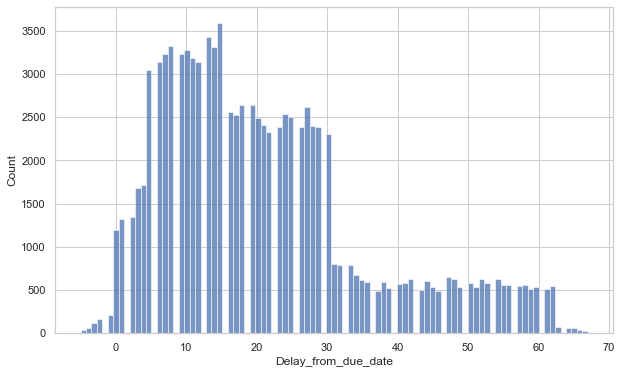

In [99]:
sns.histplot(data=df_train, x=df_train.Delay_from_due_date);

# Bu sütunda sorun yok.

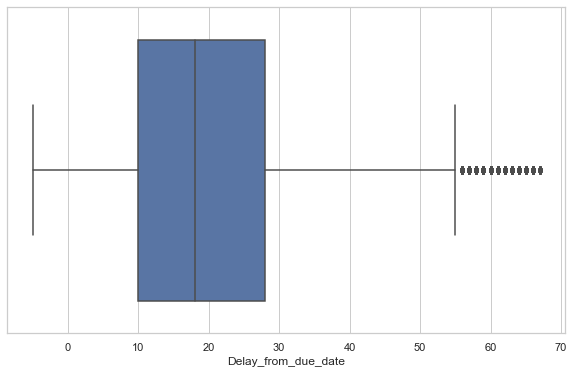

In [100]:
sns.boxplot(data=df_train, x=df_train.Delay_from_due_date);

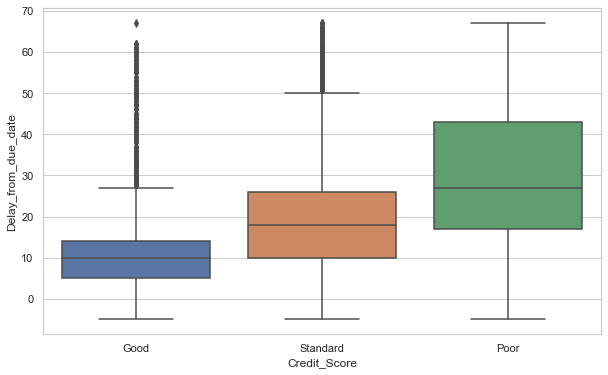

In [101]:
sns.boxplot(data=df_train, y=df_train.Delay_from_due_date, x=df_train.Credit_Score);

In [102]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Öznur_Vildan
'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card',
'Interest_Rate'

# Serdar-Allen
'Num_of_Loan',
'Type_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment'

# Samet-İlknur
Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Credit_Mix',
'Outstanding_Debt'

# 
'Credit_Utilization_Ratio',
'Credit_History_Age',
'Payment_of_Min_Amount',
'Total_EMI_per_month'

# 
'Amount_invested_monthly',
'Payment_Behaviour',
'Monthly_Balance',
'Credit_Score'

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [104]:
# Changed_Credit_Limit
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [105]:
df_train.Changed_Credit_Limit.sample(20)

57705                 19.65
68278                  1.59
22177                 11.01
66746                  8.52
57238                  6.69
56282                     _
66259                 19.36
55127                  4.11
38601                  5.54
81792                  6.25
72296                 13.22
27664                 26.68
38083                  0.65
81770                 25.72
36427                 19.33
95684    1.1900000000000004
71038                  7.76
67006                 10.75
82394                 24.05
37233                 10.61
Name: Changed_Credit_Limit, dtype: object

In [106]:
df_train.Changed_Credit_Limit.value_counts(dropna=False)

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [107]:
(df_train.Changed_Credit_Limit == "1.631.631.631.632.631.632.631.63").sum()

0

In [108]:
df_train["Changed_Credit_Limit"] = df_train.Changed_Credit_Limit.replace(["_"], [None], regex=True).astype(float)

In [109]:
df_train.Changed_Credit_Limit.value_counts(dropna=False)

 NaN      2091
 8.22      133
 11.50     127
 11.32     126
 7.35      121
          ... 
-1.84        1
 0.89        1
 28.06       1
 1.56        1
 21.17       1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [110]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].value_counts(dropna=False).head(50)

Customer_ID  Changed_Credit_Limit
CUS_0x1000    1.63                   6
              2.63                   2
CUS_0x1009    9.73                   8
CUS_0x100b    11.34                  6
             NaN                     1
              8.34                   1
CUS_0x1011    14.42                  6
              13.42                  2
CUS_0x1013    1.33                   7
              4.33                   1
CUS_0x1015    15.83                  6
             NaN                     1
              19.83                  1
CUS_0x1018    28.63                  8
CUS_0x1026    0.73                   8
CUS_0x102d    6.37                   7
              8.37                   1
CUS_0x102e    2.60                   7
              6.60                   1
CUS_0x1032    7.65                   6
             NaN                     1
              10.65                  1
CUS_0x1037    0.50                   8
CUS_0x1038    8.61                   6
             NaN              

In [111]:
df_train.Changed_Credit_Limit.round(2)

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [112]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].describe()

,count,mean,std,min,25%,50%,75%,max
Customer_ID,,,,,,,,
CUS_0x1000,8.0,1.880000,4.629100e-01,1.63,1.63,1.63,1.88,2.63
CUS_0x1009,8.0,9.730000,1.899005e-15,9.73,9.73,9.73,9.73,9.73
CUS_0x100b,7.0,10.911429,1.133893e+00,8.34,11.34,11.34,11.34,11.34
CUS_0x1011,8.0,14.170000,4.629100e-01,13.42,14.17,14.42,14.42,14.42
CUS_0x1013,8.0,1.705000,1.060660e+00,1.33,1.33,1.33,1.33,4.33
...,...,...,...,...,...,...,...,...
CUS_0xff3,8.0,8.485000,3.020761e+00,6.86,6.86,6.86,8.36,13.86
CUS_0xff4,8.0,8.205000,1.060660e+00,7.83,7.83,7.83,7.83,10.83
CUS_0xff6,8.0,11.900000,2.777460e+00,10.40,10.40,10.40,11.90,16.40


In [113]:
df_train[df_train.Customer_ID == "CUS_0x100b"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1528,0x1ef6,CUS_0x100b,January,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,14,7,11.34,1.0,Good,1030.2,37.998760,15 Years and 3 Months,No,0.0,397.24184577026637,Low_spent_Medium_value_payments,837.7364042297336,Poor
1529,0x1ef7,CUS_0x100b,February,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,14,9,11.34,2271.0,_,1030.2,35.947655,NaN,No,0.0,661.6240479398714,Low_spent_Large_value_payments,563.3542020601286,Poor
1530,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,19,7,11.34,1.0,Good,1030.2,43.829630,15 Years and 5 Months,No,0.0,NaN,High_spent_Large_value_payments,962.5677054168697,Poor
1531,0x1ef9,CUS_0x100b,April,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,14,7,NaN,1.0,Good,1030.2,31.016086,15 Years and 6 Months,No,0.0,__10000__,High_spent_Large_value_payments,969.7201635239168,Standard
1532,0x1efa,CUS_0x100b,May,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,9,7,11.34,1.0,Good,1030.2,32.035662,15 Years and 7 Months,No,0.0,758.0831954920012,Low_spent_Small_value_payments,486.8950545079987,Poor
1533,0x1efb,CUS_0x100b,June,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,14,7,11.34,1.0,Good,1030.2,40.136062,15 Years and 8 Months,No,0.0,424.0032051421769,Low_spent_Medium_value_payments,810.9750448578231,Poor
1534,0x1efc,CUS_0x100b,July,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,10,7,11.34,4.0,Good,1030.2,29.174795,15 Years and 9 Months,NM,0.0,174.28759775147847,High_spent_Large_value_payments,1020.6906522485216,Standard
1535,0x1efd,CUS_0x100b,August,Shirboni,19,238-62-0395,Media_Manager,113781.39,9549.7825,1,4,1,0,No Credit,14,8,8.34,4.0,Good,1030.2,28.592943,15 Years and 10 Months,No,0.0,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,Standard


In [114]:
# df_train.Changed_Credit_Limit sütununu median ile doldurmak en doğrusu.

df_train.groupby("Customer_ID")["Changed_Credit_Limit"].transform(lambda x : x.median()).head(20)

# Bu yöntemle bir müşteriye ait tüm değerler median değerine değişmiş olur. Biz bunu istemiyoruz.
# Sadece Null değerleri median ile doldurmak istiyoruz.

0     11.27
1     11.27
2     11.27
3     11.27
4     11.27
5     11.27
6     11.27
7     11.27
8      5.42
9      5.42
10     5.42
11     5.42
12     5.42
13     5.42
14     5.42
15     5.42
16     7.10
17     7.10
18     7.10
19     7.10
Name: Changed_Credit_Limit, dtype: float64

In [115]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].transform(lambda x: x.fillna(x.median()))

0        11.27
1        11.27
2        11.27
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [116]:
df_train.groupby("Customer_ID")["Changed_Credit_Limit"].apply(lambda x: x.fillna(x.median()))

0        11.27
1        11.27
2        11.27
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [117]:
df_train["Changed_Credit_Limit"] = df_train.groupby("Customer_ID")["Changed_Credit_Limit"].apply(lambda x: x.fillna(x.median()))

In [118]:
# Num_Credit_Inquiries

df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
             4.0                     2
             2271.0                  1
CUS_0x1011   7.0                     7
             1965.0                  1
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     7
             NaN                     1
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0              

In [119]:
(df_train.Num_Credit_Inquiries.isnull()).sum()

1965

In [120]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [121]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
             4.0                     2
             2271.0                  1
CUS_0x1011   7.0                     7
             1965.0                  1
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     7
             NaN                     1
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0              

In [122]:
df_train[df_train.Customer_ID == "CUS_0x1044"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98640,0x257fa,CUS_0x1044,January,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,5,4,14.58,1.0,Good,154.96,22.913388,31 Years and 4 Months,No,0.0,186.91203751884208,High_spent_Small_value_payments,347.967879,Standard
98641,0x257fb,CUS_0x1044,February,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,2147.0,Good,154.96,35.472059,31 Years and 5 Months,No,0.0,224.40470714333543,Low_spent_Large_value_payments,320.47521,Standard
98642,0x257fc,CUS_0x1044,March,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,1.0,Good,154.96,30.843789,31 Years and 6 Months,No,0.0,107.70673146734926,High_spent_Medium_value_payments,417.173185,Standard
98643,0x257fd,CUS_0x1044,April,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,5,3,9.58,5.0,Good,154.96,26.466149,31 Years and 7 Months,No,0.0,169.28814697415444,Low_spent_Large_value_payments,375.59177,Standard
98644,0x257fe,CUS_0x1044,May,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,6,9.58,5.0,Good,154.96,29.165226,31 Years and 8 Months,No,0.0,96.05035502361022,High_spent_Medium_value_payments,428.829562,Standard
98645,0x257ff,CUS_0x1044,June,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,5.0,Good,154.96,25.647559,31 Years and 9 Months,NM,0.0,158.1958045813031,High_spent_Small_value_payments,376.684112,Standard
98646,0x25800,CUS_0x1044,July,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,3,12.58,5.0,Good,154.96,38.117272,31 Years and 10 Months,No,0.0,69.98089251794511,High_spent_Large_value_payments,444.899024,Standard
98647,0x25801,CUS_0x1044,August,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,5.0,_,154.96,35.984109,31 Years and 11 Months,No,0.0,229.53226071473443,Low_spent_Small_value_payments,335.347656,Standard


In [123]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].mean()

Customer_ID
CUS_0x1000     10.875000
CUS_0x1009      3.000000
CUS_0x100b    285.500000
CUS_0x1011    251.750000
CUS_0x1013      3.000000
                 ...    
CUS_0xff3       4.250000
CUS_0xff4       5.000000
CUS_0xff6       2.000000
CUS_0xffc      12.375000
CUS_0xffd     263.285714
Name: Num_Credit_Inquiries, Length: 12500, dtype: float64

In [124]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].median().head(50)

# null değerlerli bfill veya ffill ile doldurmak gerekir!
# Öncesinde çok yüksek olan değerler de median ile değiştirilmelidir.

Customer_ID
CUS_0x1000    11.0
CUS_0x1009     3.0
CUS_0x100b     1.0
CUS_0x1011     7.0
CUS_0x1013     3.0
CUS_0x1015     9.0
CUS_0x1018     8.0
CUS_0x1026     3.0
CUS_0x102d     3.0
CUS_0x102e     4.0
CUS_0x1032     9.0
CUS_0x1037     3.0
CUS_0x1038    10.0
CUS_0x103e     4.0
CUS_0x1041    10.0
CUS_0x1044     5.0
CUS_0x1048     7.0
CUS_0x104a     4.0
CUS_0x104e     6.0
CUS_0x104f     7.0
CUS_0x1051     5.0
CUS_0x1056     8.0
CUS_0x1057     4.0
CUS_0x105b     0.0
CUS_0x105c     0.0
CUS_0x1063    12.0
CUS_0x1069     5.0
CUS_0x106f     6.0
CUS_0x1075     1.0
CUS_0x107c     7.0
CUS_0x107e     8.0
CUS_0x1087     5.5
CUS_0x108a    15.0
CUS_0x1096     3.0
CUS_0x1098     8.0
CUS_0x109b     1.0
CUS_0x109d    11.0
CUS_0x109f     0.0
CUS_0x10a9     4.0
CUS_0x10aa     4.0
CUS_0x10ac     1.0
CUS_0x10b3     3.0
CUS_0x10b6     1.0
CUS_0x10bb     0.0
CUS_0x10c0     8.0
CUS_0x10c5     0.0
CUS_0x10d7    14.0
CUS_0x10dd     1.0
CUS_0x10df    14.0
CUS_0x10e2    11.0
Name: Num_Credit_Inquiries, dtype: flo

In [125]:
q1 = df_train.Num_Credit_Inquiries.quantile(0.25)
q3 = df_train.Num_Credit_Inquiries.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-6.0, 18.0)

In [126]:
(df_train.Num_Credit_Inquiries < 0).sum()

0

In [127]:
df_train["Num_Credit_Inquiries"] = df_train.Num_Credit_Inquiries.replace(to_replace=[df_train.Num_Credit_Inquiries[df_train.Num_Credit_Inquiries > upper]], value=[None])

In [128]:
(df_train.Num_Credit_Inquiries.isnull()).sum()

3615

In [129]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     5
             4.0                     2
             NaN                     1
CUS_0x1011   7.0                     7
             NaN                     1
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     7
             NaN                     1
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0              

In [130]:
# null değerlerin ffill ve bfill ile doldurulması

df_train["Num_Credit_Inquiries"] = df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].apply(lambda x : x.fillna(method="ffill").fillna(method="bfill"))

In [131]:
df_train.groupby("Customer_ID")["Num_Credit_Inquiries"].value_counts(dropna=False).head(50)

Customer_ID  Num_Credit_Inquiries
CUS_0x1000   11.0                    7
             10.0                    1
CUS_0x1009   2.0                     4
             4.0                     4
CUS_0x100b   1.0                     6
             4.0                     2
CUS_0x1011   7.0                     8
CUS_0x1013   3.0                     8
CUS_0x1015   9.0                     6
             4.0                     2
CUS_0x1018   8.0                     8
CUS_0x1026   3.0                     8
CUS_0x102d   3.0                     8
CUS_0x102e   4.0                     8
CUS_0x1032   9.0                     5
             5.0                     3
CUS_0x1037   3.0                     7
             2.0                     1
CUS_0x1038   10.0                    5
             8.0                     3
CUS_0x103e   4.0                     6
             0.0                     2
CUS_0x1041   10.0                    7
             7.0                     1
CUS_0x1044   5.0              

In [132]:
(df_train["Num_Credit_Inquiries"] == 18).sum()

0

In [133]:
df_train[df_train.Customer_ID == "CUS_0x1044"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98640,0x257fa,CUS_0x1044,January,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,5,4,14.58,1.0,Good,154.96,22.913388,31 Years and 4 Months,No,0.0,186.91203751884208,High_spent_Small_value_payments,347.967879,Standard
98641,0x257fb,CUS_0x1044,February,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,1.0,Good,154.96,35.472059,31 Years and 5 Months,No,0.0,224.40470714333543,Low_spent_Large_value_payments,320.47521,Standard
98642,0x257fc,CUS_0x1044,March,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,1.0,Good,154.96,30.843789,31 Years and 6 Months,No,0.0,107.70673146734926,High_spent_Medium_value_payments,417.173185,Standard
98643,0x257fd,CUS_0x1044,April,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,5,3,9.58,5.0,Good,154.96,26.466149,31 Years and 7 Months,No,0.0,169.28814697415444,Low_spent_Large_value_payments,375.59177,Standard
98644,0x257fe,CUS_0x1044,May,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,6,9.58,5.0,Good,154.96,29.165226,31 Years and 8 Months,No,0.0,96.05035502361022,High_spent_Medium_value_payments,428.829562,Standard
98645,0x257ff,CUS_0x1044,June,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,5.0,Good,154.96,25.647559,31 Years and 9 Months,NM,0.0,158.1958045813031,High_spent_Small_value_payments,376.684112,Standard
98646,0x25800,CUS_0x1044,July,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,3,12.58,5.0,Good,154.96,38.117272,31 Years and 10 Months,No,0.0,69.98089251794511,High_spent_Large_value_payments,444.899024,Standard
98647,0x25801,CUS_0x1044,August,Maki Shirakip,44,261-18-4430,Entrepreneur,33441.59,2748.799167,2,4,1,0,No Credit,1,4,9.58,5.0,_,154.96,35.984109,31 Years and 11 Months,No,0.0,229.53226071473443,Low_spent_Small_value_payments,335.347656,Standard


In [134]:
# Birden fazla Num_Credit_Inquiries olan var.
# Bunları tek bir sayıya yine median kullanılarak düşürmek gerekir mi? yoksa böyle mi bırakalım?

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [136]:
# Credit_Mix

df_train.groupby("Customer_ID")["Credit_Mix"].value_counts(dropna=False).head(50)

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
             _             1
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
             _             2
CUS_0x1026   Good          6
             _             2
CUS_0x102d   Good          7
             _             1
CUS_0x102e   Standard      6
             _             2
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
             _             1
CUS_0x1038   Standard      5
             _             3
CUS_0x103e   Good          8
CUS_0x1041   Bad           6
             _             2
CUS_0x1044   Good          7
             _             1
CUS_0x1048   Standard      7
             _             1
CUS_0x104a   Good          6
             _             2
CUS_0x104e   Standard      5
             _             3
CUS_0x104f   Standa

In [137]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [138]:
df_train.Credit_Mix.replace(["_"], [None], inplace=True)

In [139]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [140]:
# Bu metod ile sütundaki bütün değerler mode değerleri ile değiştiriliyor. Bizim amacımız null değerleri doldurmak.
# Bu nedenle aşağıdaki metodu kullanmak daha doğru olacaktır.

df_train["Credit_Mix"] = df_train.groupby("Customer_ID")["Credit_Mix"].transform(lambda x : x.mode()[0])

In [141]:
# Customer_ID 'ye göre gruplandırılmış verilerdeki null değerlerin apply ve fillna metodları kullanılarak doldurulması

df_train["Credit_Mix"] = df_train.groupby("Customer_ID")["Credit_Mix"].apply(lambda x : x.fillna(x.mode()[0]))

In [142]:
df_train.Credit_Mix.value_counts(dropna=False)

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [144]:
# Outstanding_Debt

df_train.Outstanding_Debt.value_counts(dropna=False)

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [145]:
df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False)

Customer_ID  Outstanding_Debt
CUS_0x1000   1562.91             8
CUS_0x1009   202.68              7
             202.68_             1
CUS_0x100b   1030.2              8
CUS_0x1011   473.14              8
                                ..
CUS_0xff3    1229.08             8
CUS_0xff4    758.44              8
CUS_0xff6    338.3               8
CUS_0xffc    1300.13             8
CUS_0xffd    1701.88             8
Name: Outstanding_Debt, Length: 13481, dtype: int64

In [146]:
df_train["Outstanding_Debt"] = df_train.Outstanding_Debt.str.replace("_", "").astype(float)

In [147]:
df_train.Outstanding_Debt.value_counts(dropna=False)

1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [148]:
df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False).head(50)

Customer_ID  Outstanding_Debt
CUS_0x1000   1562.91             8
CUS_0x1009   202.68              8
CUS_0x100b   1030.20             8
CUS_0x1011   473.14              8
CUS_0x1013   1233.51             8
CUS_0x1015   340.22              8
CUS_0x1018   2773.09             8
CUS_0x1026   849.69              8
CUS_0x102d   648.36              8
CUS_0x102e   869.59              8
CUS_0x1032   1852.86             8
CUS_0x1037   665.82              8
CUS_0x1038   568.21              8
CUS_0x103e   706.96              8
CUS_0x1041   4913.15             8
CUS_0x1044   154.96              8
CUS_0x1048   1835.67             8
CUS_0x104a   1122.46             8
CUS_0x104e   1127.57             8
CUS_0x104f   177.98              8
CUS_0x1051   1000.44             8
CUS_0x1056   2107.76             8
CUS_0x1057   718.53              8
CUS_0x105b   180.70              8
CUS_0x105c   542.91              8
CUS_0x1063   583.11              8
CUS_0x1069   208.80              8
CUS_0x106f   767.91      

In [149]:
(df_train.groupby("Customer_ID")["Outstanding_Debt"].value_counts(dropna=False) != 8).sum()

0

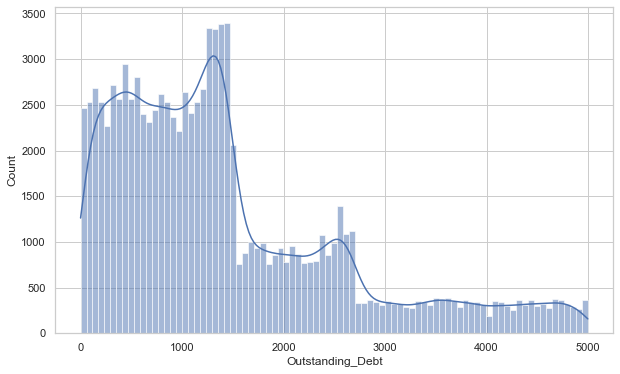

In [150]:
sns.histplot(data=df_train, x="Outstanding_Debt", kde=True);

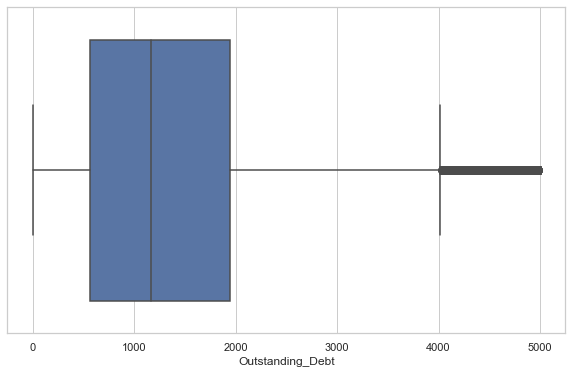

In [151]:
sns.boxplot(df_train.Outstanding_Debt);

In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [153]:
# Credit_Utilization_Ratio

df_train.Credit_Utilization_Ratio.value_counts(dropna=False)

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [154]:
df_train.groupby("Customer_ID")["Credit_Utilization_Ratio"].value_counts(dropna=False).head(50)

Customer_ID  Credit_Utilization_Ratio
CUS_0x1000   26.612093                   1
             29.439759                   1
             30.077191                   1
             32.330508                   1
             32.843081                   1
             38.149539                   1
             38.285928                   1
             40.082272                   1
CUS_0x1009   23.679534                   1
             24.996239                   1
             26.371982                   1
             28.451199                   1
             30.381814                   1
             30.608990                   1
             33.943118                   1
             40.286997                   1
CUS_0x100b   28.592943                   1
             29.174795                   1
             31.016086                   1
             32.035662                   1
             35.947655                   1
             37.998760                   1
             40.

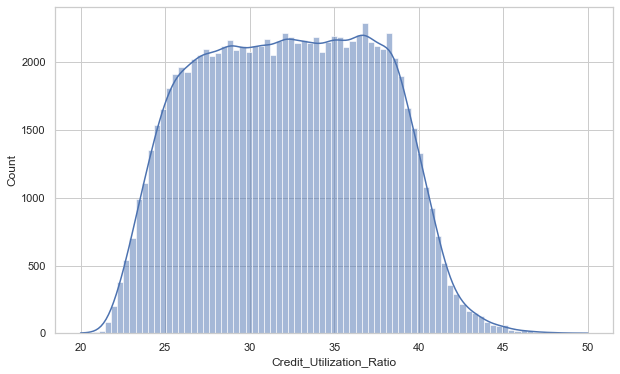

In [155]:
sns.histplot(data=df_train, x="Credit_Utilization_Ratio", kde=True);

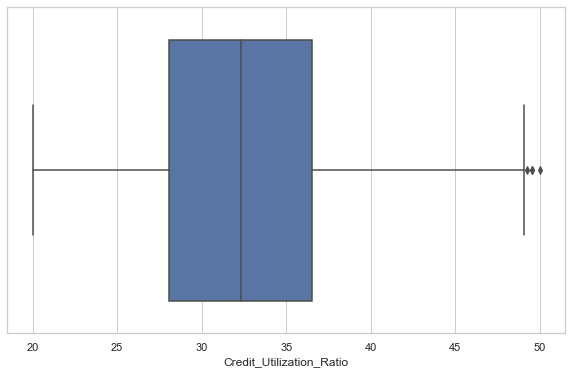

In [156]:
sns.boxplot(df_train.Credit_Utilization_Ratio);

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [158]:
# Credit_History_Age

df_train.Credit_History_Age.value_counts(dropna=False)

NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
                          ... 
0 Years and 3 Months        20
0 Years and 2 Months        15
33 Years and 7 Months       14
33 Years and 8 Months       12
0 Years and 1 Months         2
Name: Credit_History_Age, Length: 405, dtype: int64

In [159]:
df_train.groupby("Customer_ID")["Credit_History_Age"].value_counts(dropna=False).head(50)

Customer_ID  Credit_History_Age    
CUS_0x1000   10 Years and 2 Months     1
             10 Years and 3 Months     1
             10 Years and 4 Months     1
             10 Years and 5 Months     1
             10 Years and 6 Months     1
             10 Years and 7 Months     1
             10 Years and 8 Months     1
             10 Years and 9 Months     1
CUS_0x1009   NaN                       1
             30 Years and 10 Months    1
             30 Years and 11 Months    1
             30 Years and 5 Months     1
             30 Years and 6 Months     1
             30 Years and 7 Months     1
             30 Years and 9 Months     1
             31 Years and 0 Months     1
CUS_0x100b   NaN                       1
             15 Years and 10 Months    1
             15 Years and 3 Months     1
             15 Years and 5 Months     1
             15 Years and 6 Months     1
             15 Years and 7 Months     1
             15 Years and 8 Months     1
             15 Years

In [160]:
df_train["Credit_History_Age"].head(50)

0      22 Years and 1 Months
1                        NaN
2      22 Years and 3 Months
3      22 Years and 4 Months
4      22 Years and 5 Months
5      22 Years and 6 Months
6      22 Years and 7 Months
7                        NaN
8      26 Years and 7 Months
9      26 Years and 8 Months
10     26 Years and 9 Months
11    26 Years and 10 Months
12    26 Years and 11 Months
13     27 Years and 0 Months
14     27 Years and 1 Months
15     27 Years and 2 Months
16     17 Years and 9 Months
17    17 Years and 10 Months
18    17 Years and 11 Months
19                       NaN
20     18 Years and 1 Months
21     18 Years and 2 Months
22     18 Years and 3 Months
23     18 Years and 4 Months
24     17 Years and 3 Months
25     17 Years and 4 Months
26     17 Years and 5 Months
27     17 Years and 6 Months
28     17 Years and 7 Months
29     17 Years and 8 Months
30     17 Years and 9 Months
31    17 Years and 10 Months
32     30 Years and 8 Months
33     30 Years and 9 Months
34    30 Years

In [161]:
df_Credit_History_Age = df_train.Credit_History_Age.str.split()

In [162]:
int(df_Credit_History_Age[0][0])*12 + int(df_Credit_History_Age[0][3])

265

In [163]:
df_Credit_History_Age

0         [22, Years, and, 1, Months]
1                                 NaN
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
99995     [31, Years, and, 6, Months]
99996     [31, Years, and, 7, Months]
99997     [31, Years, and, 8, Months]
99998     [31, Years, and, 9, Months]
99999    [31, Years, and, 10, Months]
Name: Credit_History_Age, Length: 100000, dtype: object

In [164]:
df_train.Credit_History_Age.str.split()

0         [22, Years, and, 1, Months]
1                                 NaN
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
99995     [31, Years, and, 6, Months]
99996     [31, Years, and, 7, Months]
99997     [31, Years, and, 8, Months]
99998     [31, Years, and, 9, Months]
99999    [31, Years, and, 10, Months]
Name: Credit_History_Age, Length: 100000, dtype: object

In [165]:
def Cred_Hist_Age (cha) :
    if type(cha) == float :   # veya pd.isna(cha) da denenebilir
        return cha
    else :
        return int(cha.split()[0])*12 + int(cha.split()[3])


df_train["Credit_History_Age"] = df_train.Credit_History_Age.apply(Cred_Hist_Age)

In [166]:
df_train.Credit_History_Age.value_counts(dropna=False).head(50)

NaN      9030
191.0     446
232.0     445
233.0     444
215.0     443
231.0     441
213.0     438
190.0     436
214.0     435
189.0     432
219.0     428
220.0     426
218.0     426
237.0     422
212.0     419
188.0     415
227.0     414
194.0     412
221.0     410
226.0     408
239.0     405
238.0     403
207.0     403
236.0     403
209.0     402
225.0     402
230.0     401
197.0     396
224.0     396
200.0     396
195.0     396
208.0     395
206.0     395
196.0     393
202.0     386
216.0     382
201.0     381
192.0     381
203.0     373
211.0     372
217.0     371
234.0     362
187.0     357
193.0     356
235.0     355
228.0     354
242.0     354
222.0     351
229.0     349
210.0     349
Name: Credit_History_Age, dtype: int64

In [167]:
df_train.groupby("Customer_ID")["Credit_History_Age"].value_counts(dropna=False).head(50)

Customer_ID  Credit_History_Age
CUS_0x1000   122.0                 1
             123.0                 1
             124.0                 1
             125.0                 1
             126.0                 1
             127.0                 1
             128.0                 1
             129.0                 1
CUS_0x1009   NaN                   1
             365.0                 1
             366.0                 1
             367.0                 1
             369.0                 1
             370.0                 1
             371.0                 1
             372.0                 1
CUS_0x100b   NaN                   1
             183.0                 1
             185.0                 1
             186.0                 1
             187.0                 1
             188.0                 1
             189.0                 1
             190.0                 1
CUS_0x1011   183.0                 1
             184.0                 1
      

In [168]:
df_train["Credit_History_Age"].head(50)

0     265.0
1       NaN
2     267.0
3     268.0
4     269.0
5     270.0
6     271.0
7       NaN
8     319.0
9     320.0
10    321.0
11    322.0
12    323.0
13    324.0
14    325.0
15    326.0
16    213.0
17    214.0
18    215.0
19      NaN
20    217.0
21    218.0
22    219.0
23    220.0
24    207.0
25    208.0
26    209.0
27    210.0
28    211.0
29    212.0
30    213.0
31    214.0
32    368.0
33    369.0
34    370.0
35    371.0
36    372.0
37    373.0
38    374.0
39    375.0
40      NaN
41    384.0
42      NaN
43    386.0
44    387.0
45      NaN
46    389.0
47    390.0
48    367.0
49    368.0
Name: Credit_History_Age, dtype: float64

In [169]:
def fill_first_null(x) :
#     print(x.index[0], x.values[0], min(x), pd.isna(x.values[0]), pd.isna(min(x)))

    if pd.isna(x.values[0]) :
#         print("XXXXXXXXXXX")
        x.values[0] = x.values[1] - 1
        return x.values[0]
    else :
        return x.values[0]
#     for i in range(1, len(x)) :
#         if pd.isna(x.values[i]) :
#             x.values[i] = x.values[i-1] + 1
#             return x.values[i]
#         else :
#             return x.values[i]
                

# df_train["History_Age"] = df_train.groupby("Customer_ID")["Credit_History_Age"].transform(lambda x : fill_first_null(x))

# veya

df_train["History_Age"] = df_train.groupby("Customer_ID")["Credit_History_Age"].transform(fill_first_null)


In [170]:
df_train["History_Age"]

0        265.0
1        265.0
2        265.0
3        265.0
4        265.0
         ...  
99995    375.0
99996    375.0
99997    375.0
99998    375.0
99999    375.0
Name: History_Age, Length: 100000, dtype: float64

In [171]:
df_train["History_Age"] = df_train["History_Age"].fillna(0)

In [172]:
df_train["History_Age"].isnull().sum()

0

In [173]:
df_train["Final_Age"] = df_train.groupby("Customer_ID")["History_Age"].transform(lambda x : np.arange(int(x.min()), int(x.min())+8))

In [174]:
df_train["Final_Age"].isnull().sum()

0

In [175]:
df_train[["Final_Age", "Credit_History_Age"]].head(50)

,Final_Age,Credit_History_Age
0,265,265.0
1,266,NaN
2,267,267.0
3,268,268.0
4,269,269.0
5,270,270.0
6,271,271.0
7,272,NaN
8,319,319.0
9,320,320.0


In [176]:
df_train["History_Age_with_last_def"]  = df_train["Credit_History_Age"].fillna(0)

In [177]:
# Tek fonksiyon ile artan değerler ile Customer bazında verilerin düzeltilmesi (önce ilk ısradaki null değerlerin 0 ile değiştirilmesi gerekir.)

def fill_all_age_incremental (x) :
    if x.values[0] == 0 :
        return np.arange((int(x.values[1])-1), (int(x.values[1])-1)+len(x))
    else :
        return np.arange(int(x.values[0]), int(x.values[0])+len(x))

                

# df_train["History_Age"] = df_train.groupby("Customer_ID")["Credit_History_Age"].transform(lambda x : fill_all_age_incremental(x))

# veya

df_train["History_Age_with_last_defx"] = df_train.groupby("Customer_ID")["History_Age_with_last_def"].transform(fill_all_age_incremental)


In [178]:
df_train[["History_Age_with_last_defx", "Credit_History_Age"]].head(50)

,History_Age_with_last_defx,Credit_History_Age
0,265,265.0
1,266,NaN
2,267,267.0
3,268,268.0
4,269,269.0
5,270,270.0
6,271,271.0
7,272,NaN
8,319,319.0
9,320,320.0


In [179]:
np.arange(265,265+8)

array([265, 266, 267, 268, 269, 270, 271, 272])

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  object 
 1   Customer_ID                 100000 non-null  object 
 2   Month                       100000 non-null  object 
 3   Name                        100000 non-null  object 
 4   Age                         100000 non-null  int32  
 5   SSN                         100000 non-null  object 
 6   Occupation                  100000 non-null  object 
 7   Annual_Income               100000 non-null  float64
 8   Monthly_Inhand_Salary       100000 non-null  float64
 9   Num_Bank_Accounts           100000 non-null  int32  
 10  Num_Credit_Card             100000 non-null  int32  
 11  Interest_Rate               100000 non-null  int32  
 12  Num_of_Loan                 100000 non-null  int32  
 13  Type_of_Loan   

In [181]:
# Payment_of_Min_Amount

df_train.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [182]:
df_train.groupby("Customer_ID")["Payment_of_Min_Amount"].value_counts(dropna=False).head(50)

Customer_ID  Payment_of_Min_Amount
CUS_0x1000   Yes                      8
CUS_0x1009   Yes                      7
             NM                       1
CUS_0x100b   No                       7
             NM                       1
CUS_0x1011   Yes                      7
             NM                       1
CUS_0x1013   No                       7
             NM                       1
CUS_0x1015   Yes                      6
             NM                       2
CUS_0x1018   Yes                      7
             NM                       1
CUS_0x1026   No                       8
CUS_0x102d   No                       7
             NM                       1
CUS_0x102e   Yes                      7
             NM                       1
CUS_0x1032   Yes                      7
             NM                       1
CUS_0x1037   No                       6
             NM                       2
CUS_0x1038   Yes                      8
CUS_0x103e   No                       7
     

In [183]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,265.0,265,265.0,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,265.0,266,0.0,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,265.0,267,267.0,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,265.0,268,268.0,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,265.0,269,269.0,269
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,265.0,270,270.0,270
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,265.0,271,271.0,271
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,265.0,272,0.0,272
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,319.0,319,319.0,319
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,319.0,320,320.0,320


In [184]:
df_train["Payment_of_Min_Amount"] = df_train.groupby("Customer_ID")["Payment_of_Min_Amount"].transform(lambda x: x.mode()[0])

In [185]:
df_train["Payment_of_Min_Amount"].value_counts(dropna=False)

Yes    58880
No     40248
NM       872
Name: Payment_of_Min_Amount, dtype: int64

In [186]:
df_train[df_train["Payment_of_Min_Amount"] == "NM"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
392,0x184e,CUS_0x22a3,January,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",18,10,11.94,2.0,Standard,1079.73,33.776928,379.0,NM,95.521629,NaN,High_spent_Large_value_payments,884.9056902902464,Standard,379.0,379,379.0,379
393,0x184f,CUS_0x22a3,February,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",23,10,11.94,2.0,Standard,1079.73,35.740067,380.0,NM,95.521629,265.3115233534598,High_spent_Medium_value_payments,717.1043478643835,Standard,379.0,380,380.0,380
394,0x1850,CUS_0x22a3,March,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",23,10,11.94,2.0,Standard,1079.73,42.137603,381.0,NM,95.521629,377.3584081424742,Low_spent_Medium_value_payments,635.0574630753691,Standard,379.0,381,381.0,381
395,0x1851,CUS_0x22a3,April,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",28,NaN,13.94,2.0,Standard,1079.73,28.068382,382.0,NM,95.521629,623.4087218945351,Low_spent_Medium_value_payments,389.00714932330817,Good,379.0,382,382.0,382
396,0x1852,CUS_0x22a3,May,Nate Raymondj,38,477-90-5881,Doctor,95956.50,8279.375000,8,4,11,2,"Personal Loan, and Student Loan",22,13,11.94,2.0,Standard,1079.73,37.207262,383.0,NM,95.521629,517.8021721033211,High_spent_Small_value_payments,474.61369911452215,Standard,379.0,383,383.0,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98251,0x255b1,CUS_0x867e,April,Gregl,39,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,22,2.77,8.0,Bad,1539.53,28.500572,200.0,NM,141.922723,272.5694865952707,Low_spent_Medium_value_payments,149.30562398203847,Poor,197.0,200,200.0,200
98252,0x255b2,CUS_0x867e,May,Gregl,39,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,NaN,2.77,8.0,Bad,1539.53,29.296071,201.0,NM,141.922723,344.4318179919941,Low_spent_Small_value_payments,87.44329258531508,Poor,197.0,201,201.0,201
98253,0x255b3,CUS_0x867e,June,Gregl,39,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,22,2.77,8.0,Bad,1539.53,34.736699,NaN,NM,141.922723,161.47967710361945,High_spent_Small_value_payments,240.39543347368968,Poor,197.0,202,0.0,202
98254,0x255b4,CUS_0x867e,July,Gregl,40,500-65-8725,Teacher,32471.74,2837.978333,7,10,19,9,"Not Specified, Debt Consolidation Loan, Debt C...",60,NaN,2.77,11.0,Bad,1539.53,33.530443,203.0,NM,141.922723,235.66515548463585,Low_spent_Medium_value_payments,186.2099550926733,Poor,197.0,203,203.0,203


In [187]:
df_train[df_train["Payment_of_Min_Amount"] == "NM"].groupby("Customer_ID")["Payment_of_Min_Amount"].value_counts()

Customer_ID  Payment_of_Min_Amount
CUS_0x10b3   NM                       8
CUS_0x1136   NM                       8
CUS_0x15df   NM                       8
CUS_0x1604   NM                       8
CUS_0x1733   NM                       8
                                     ..
CUS_0xc299   NM                       8
CUS_0xc515   NM                       8
CUS_0xc6c3   NM                       8
CUS_0xd6a    NM                       8
CUS_0xebd    NM                       8
Name: Payment_of_Min_Amount, Length: 109, dtype: int64

In [188]:
df_train[df_train["Customer_ID"] == "CUS_0x1136"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
86640,0x211aa,CUS_0x1136,January,Stevenk,21,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",41,NaN,9.89,11.0,Standard,1271.23,26.881629,135.0,NM,93.341747,__10000__,Low_spent_Small_value_payments,104.89644263000065,Poor,135.0,135,135.0,135
86641,0x211ab,CUS_0x1136,February,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,12,9.89,11.0,Standard,1271.23,38.779827,136.0,NM,93.341747,79.14896534244873,Low_spent_Large_value_payments,383.9504547570575,Poor,135.0,136,136.0,136
86642,0x211ac,CUS_0x1136,March,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,10,9.89,11.0,Standard,1271.23,25.599650,137.0,NM,93.341747,318.80344840104766,Low_spent_Small_value_payments,164.29597169845854,Poor,135.0,137,137.0,137
86643,0x211ad,CUS_0x1136,April,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,12,9.89,11.0,Standard,1271.23,30.870808,138.0,NM,93.341747,57.46321106419054,High_spent_Large_value_payments,375.63620903531563,Poor,135.0,138,138.0,138
86644,0x211ae,CUS_0x1136,May,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",39,12,9.89,11.0,Standard,1271.23,31.684874,139.0,NM,93.341747,89.09077962665664,!@9#%8,374.00864047284966,Poor,135.0,139,139.0,139
86645,0x211af,CUS_0x1136,June,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,12,9.89,11.0,Standard,1271.23,32.578704,140.0,NM,93.341747,63.44863991473133,High_spent_Small_value_payments,389.65078018477476,Poor,135.0,140,140.0,140
86646,0x211b0,CUS_0x1136,July,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,12,9.89,11.0,Standard,1271.23,36.475308,141.0,NM,93.341747,148.63707621614932,High_spent_Small_value_payments,304.4623438833569,Poor,135.0,141,141.0,141
86647,0x211b1,CUS_0x1136,August,Stevenk,22,894-06-9872,Entrepreneur,37360.94,2864.411667,10,5,33,5,"Home Equity Loan, Auto Loan, Debt Consolidatio...",44,12,9.89,11.0,Standard,1271.23,36.196346,142.0,NM,93.341747,254.47810388792874,Low_spent_Small_value_payments,228.62131621157747,Poor,135.0,142,142.0,142


In [189]:
# Yukarıdaki sonuca göre 109 kişinin Payment_of_Min_Amount değerleri belirtilmemiş. Bu satırları silelim mi?
# Payment_of_Min_Amount bilgisi credit score değerini etkileyen bir parametre mi?
# Payment_of_Min_Amount ile credit score değerleri arasında korelasyon var mı?
# bunlara bakılacak.


In [190]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  object 
 1   Customer_ID                 100000 non-null  object 
 2   Month                       100000 non-null  object 
 3   Name                        100000 non-null  object 
 4   Age                         100000 non-null  int32  
 5   SSN                         100000 non-null  object 
 6   Occupation                  100000 non-null  object 
 7   Annual_Income               100000 non-null  float64
 8   Monthly_Inhand_Salary       100000 non-null  float64
 9   Num_Bank_Accounts           100000 non-null  int32  
 10  Num_Credit_Card             100000 non-null  int32  
 11  Interest_Rate               100000 non-null  int32  
 12  Num_of_Loan                 100000 non-null  int32  
 13  Type_of_Loan   

In [191]:
# Total_EMI_per_month

df_train.Total_EMI_per_month.value_counts(dropna=False)

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [192]:
df_train.groupby("Customer_ID")["Total_EMI_per_month"].value_counts(dropna=False)

Customer_ID  Total_EMI_per_month
CUS_0x1000   42.941090              8
CUS_0x1009   108.366467             8
CUS_0x100b   0.000000               8
CUS_0x1011   123.434939             8
CUS_0x1013   228.018084             7
                                   ..
CUS_0xff3    33.299764              8
CUS_0xff4    101.328637             8
CUS_0xff6    126.638453             8
CUS_0xffc    272.809169             8
CUS_0xffd    182.976649             8
Name: Total_EMI_per_month, Length: 16436, dtype: int64

In [193]:
df_train.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,265.0,265,265.0,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,265.0,266,0.0,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,265.0,267,267.0,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,265.0,268,268.0,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,265.0,269,269.0,269
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,265.0,270,270.0,270
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,265.0,271,271.0,271
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,265.0,272,0.0,272
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,319.0,319,319.0,319
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,319.0,320,320.0,320


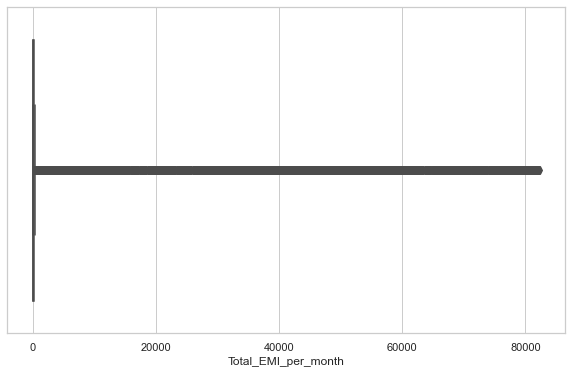

In [194]:
sns.boxplot(df_train["Total_EMI_per_month"]);

In [195]:
q1 = df_train.Total_EMI_per_month.quantile(0.25)
q3 = df_train.Total_EMI_per_month.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-166.06972242783047, 357.60063203221614)

In [196]:
(df_train["Total_EMI_per_month"] < 0).sum()

0

In [197]:
df_train["Total_EMI_per_month"].tail(50)

99950       26.778419
99951       26.778419
99952      114.271146
99953      114.271146
99954      114.271146
99955      362.072453
99956      362.072453
99957      362.072453
99958      362.072453
99959      362.072453
99960    50894.000000
99961       34.975457
99962       34.975457
99963       34.975457
99964       34.975457
99965       34.975457
99966       34.975457
99967       34.975457
99968       41.113561
99969       41.113561
99970    75011.000000
99971       41.113561
99972       41.113561
99973       41.113561
99974       41.113561
99975       41.113561
99976       84.205949
99977       84.205949
99978       84.205949
99979       84.205949
99980       84.205949
99981       84.205949
99982       84.205949
99983       84.205949
99984       60.964772
99985    12112.000000
99986       60.964772
99987       60.964772
99988       60.964772
99989       60.964772
99990       60.964772
99991       60.964772
99992       35.104023
99993    58638.000000
99994       35.104023
99995     

In [198]:
(df_train["Total_EMI_per_month"] > 1000).sum()

3411

In [199]:
df_train[df_train["Total_EMI_per_month"] > 1000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,No Credit,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.0,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,383.0,383,0.0,383
45,0x1643,CUS_0x95ee,June,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,No Credit,7,7,10.14,2.0,Good,548.20,35.275437,NaN,No,15515.0,235.79032503182026,Low_spent_Large_value_payments,633.0801749681799,Good,383.0,388,0.0,388
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,370.0,No,23834.0,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,367.0,370,370.0,370
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,371.0,No,32662.0,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,367.0,371,371.0,371
76,0x1672,CUS_0xba08,May,Jamesj,44,366-68-1681,Journalist,31370.80,2825.233333,1,6,12,2,"Not Specified, and Payday Loan",1,0,5.76,5.0,Good,421.43,25.189232,321.0,No,16415.0,184.70057162057685,Low_spent_Small_value_payments,341.20663263941435,Good,317.0,321,321.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99921,0x25f7b,CUS_0x2654,February,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,12.39,8.0,Standard,365.66,40.171095,356.0,Yes,20563.0,421.3188655158438,High_spent_Medium_value_payments,582.724785,Standard,355.0,356,356.0,356
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,0,4.10,1.0,Good,1079.48,27.289440,337.0,No,50894.0,78.51494451125625,High_spent_Small_value_payments,493.341182,Good,337.0,337,337.0,337
99970,0x25fc4,CUS_0xf16,March,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,0,5.69,8.0,Good,897.16,30.472041,255.0,No,75011.0,75.50497238307716,Low_spent_Medium_value_payments,316.184384,Good,253.0,255,255.0,255
99985,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,23.31,9.0,Bad,3571.70,39.772607,69.0,Yes,12112.0,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor,68.0,69,69.0,69


In [200]:
df_train[df_train["Total_EMI_per_month"] > upper].head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.460,5988.705000,4,5,8,0,No Credit,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,383.0,383,0.0,383
45,0x1643,CUS_0x95ee,June,Np,31,612-70-8987,Lawyer,73928.460,5988.705000,4,5,8,0,No Credit,7,7,10.14,2.0,Good,548.20,35.275437,NaN,No,15515.000000,235.79032503182026,Low_spent_Large_value_payments,633.0801749681799,Good,383.0,388,0.0,388
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,369.0,No,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good,367.0,369,369.0,369
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,370.0,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,367.0,370,370.0,370
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,371.0,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,367.0,371,371.0,371
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,372.0,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard,367.0,372,372.0,372
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,373.0,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good,367.0,373,373.0,373
55,0x1651,CUS_0x284a,August,Nadiaq,34,411-51-0676,Lawyer,131313.400,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,4.0,Good,352.16,29.187913,374.0,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good,367.0,374,374.0,374
76,0x1672,CUS_0xba08,May,Jamesj,44,366-68-1681,Journalist,31370.800,2825.233333,1,6,12,2,"Not Specified, and Payday Loan",1,0,5.76,5.0,Good,421.43,25.189232,321.0,No,16415.000000,184.70057162057685,Low_spent_Small_value_payments,341.20663263941435,Good,317.0,321,321.0,321
94,0x168c,CUS_0xc0ab,July,Soyoungd,33,342-90-2649,Engineer,88640.240,7266.686667,3,6,1,2,"Payday Loan, and Payday Loan",4,2,3.51,3.0,Good,950.36,25.979173,311.0,No,80357.000000,164.0748218779106,High_spent_Large_value_payments,667.4204738170387,Good,305.0,311,311.0,311


In [201]:
df_train[df_train.Customer_ID=="CUS_0x284a"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,367.0,No,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good,367.0,367,367.0,367
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",-1,2,15.34,4.0,Good,352.16,31.983710,368.0,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good,367.0,368,368.0,368
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,369.0,No,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good,367.0,369,369.0,369
51,0x164d,CUS_0x284a,April,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,370.0,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,367.0,370,370.0,370
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,371.0,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,367.0,371,371.0,371
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,372.0,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard,367.0,372,372.0,372
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,373.0,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good,367.0,373,373.0,373
55,0x1651,CUS_0x284a,August,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,4.0,Good,352.16,29.187913,374.0,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good,367.0,374,374.0,374


In [202]:
# df_train.groupby("Customer_ID")["Total_EMI_per_month"].median().sort_values(ascending=False).head(10).index.tolist()
df_train[df_train.Customer_ID.isin(df_train.groupby("Customer_ID")["Total_EMI_per_month"].median().sort_values(ascending=False).head(10).index)].head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
9376,0x4cf2,CUS_0x3655,January,Ransdellw,29,512-00-8324,Lawyer,177907.72,14712.643333,0,6,6,0,No Credit,8,8,10.76,0.0,Good,685.01,39.432897,367.0,No,0.000000,__10000__,High_spent_Large_value_payments,1602.0405189622518,Poor,367.0,367,367.0,367
9377,0x4cf3,CUS_0x3655,February,Ransdellw,29,512-00-8324,Lawyer,177907.72,14712.643333,0,6,6,0,No Credit,8,8,10.76,0.0,Good,685.01,42.380056,368.0,No,0.000000,263.79006935644884,High_spent_Medium_value_payments,1457.4742639768847,Poor,367.0,368,368.0,368
9378,0x4cf4,CUS_0x3655,March,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,8,10,10.76,0.0,Good,685.01,40.275432,369.0,No,1634.213281,668.40172571891,Low_spent_Large_value_payments,1072.8626076144237,Poor,367.0,369,369.0,369
9379,0x4cf5,CUS_0x3655,April,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,8,8,10.76,0.0,Good,685.01,44.798586,370.0,No,1634.213281,291.34558129195665,High_spent_Medium_value_payments,1429.9187520413766,Standard,367.0,370,370.0,370
9380,0x4cf6,CUS_0x3655,May,Ransdellw,29,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,7,8,16.76,0.0,Good,685.01,33.439295,371.0,No,1634.213281,463.7064001795235,High_spent_Small_value_payments,1267.55793315381,Standard,367.0,371,371.0,371
9381,0x4cf7,CUS_0x3655,June,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,8,8,10.76,0.0,Good,685.01,30.948987,372.0,No,1634.213281,694.0830900175564,Low_spent_Large_value_payments,1047.181243315777,Standard,367.0,372,372.0,372
9382,0x4cf8,CUS_0x3655,July,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,8,8,10.76,0.0,Good,685.01,50.000000,373.0,No,1634.213281,188.1620676053859,High_spent_Medium_value_payments,1533.1022657279475,Standard,367.0,373,373.0,373
9383,0x4cf9,CUS_0x3655,August,Ransdellw,30,512-00-8324,Lawyer,177907.72,13078.430052,0,6,6,0,No Credit,8,10,10.76,0.0,Good,685.01,45.924655,374.0,No,1634.213281,327.28282179955244,High_spent_Large_value_payments,1383.981511533781,Standard,367.0,374,374.0,374
12864,0x6162,CUS_0x3ebe,January,Emmax,34,327-35-3349,Scientist,134737.59,11180.132500,1,7,7,0,No Credit,11,11,4.13,2.0,Good,1275.51,39.580259,383.0,No,0.000000,314.9179313824261,High_spent_Small_value_payments,1063.095318617574,Good,383.0,383,383.0,383
12865,0x6163,CUS_0x3ebe,February,Emmax,35,327-35-3349,Scientist,134737.59,11180.132500,1,7,7,0,No Credit,11,11,4.13,2.0,Good,1275.51,39.753905,384.0,No,0.000000,153.99389499681465,High_spent_Large_value_payments,1204.0193550031854,Standard,383.0,384,384.0,384


In [203]:
max_mode = df_train.groupby("Customer_ID")["Total_EMI_per_month"].apply(lambda x: x.mode()[0]).max()
max_mode

1779.1032538262775

In [204]:
# max mode değerinden yüksek olanlar ilgili customera ait mode değeri ile değiştirilebilir.

In [205]:
df_train.Total_EMI_per_month.replace([df_train[(df_train.Total_EMI_per_month > max_mode)]["Total_EMI_per_month"]], [None]).isnull().sum()

3121

In [237]:
df_train["Total_EMI_per_month"] = df_train.groupby("Customer_ID")["Total_EMI_per_month"].apply(lambda x: x.fillna(x.mode()[0]))

In [238]:
df_train["Total_EMI_per_month"].value_counts(dropna=False)

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [207]:
df_train.groupby("Customer_ID")["Total_EMI_per_month"].transform(lambda x: x.mode()[0])

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 100000, dtype: float64

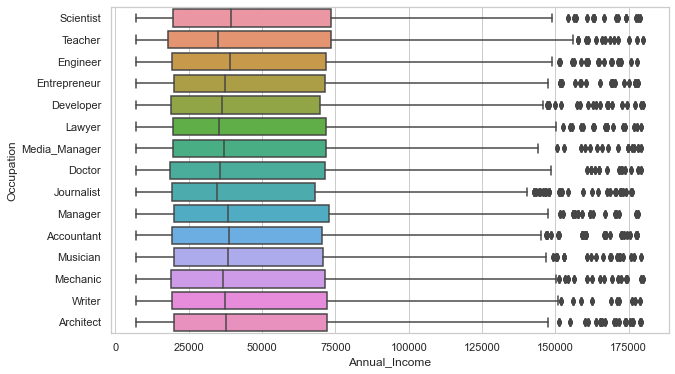

In [208]:
sns.boxplot(x=df_train.Annual_Income, y=df_train.Occupation);

In [209]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  object 
 1   Customer_ID                 100000 non-null  object 
 2   Month                       100000 non-null  object 
 3   Name                        100000 non-null  object 
 4   Age                         100000 non-null  int32  
 5   SSN                         100000 non-null  object 
 6   Occupation                  100000 non-null  object 
 7   Annual_Income               100000 non-null  float64
 8   Monthly_Inhand_Salary       100000 non-null  float64
 9   Num_Bank_Accounts           100000 non-null  int32  
 10  Num_Credit_Card             100000 non-null  int32  
 11  Interest_Rate               100000 non-null  int32  
 12  Num_of_Loan                 100000 non-null  int32  
 13  Type_of_Loan   

In [210]:
# Amount_invested_monthly

df_train.Amount_invested_monthly.value_counts(dropna=False)

NaN                   4479
__10000__             4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91050, dtype: int64

In [211]:
df_train.Amount_invested_monthly.str.replace("_", "").astype(float).apply([min,max])

min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

<AxesSubplot:>

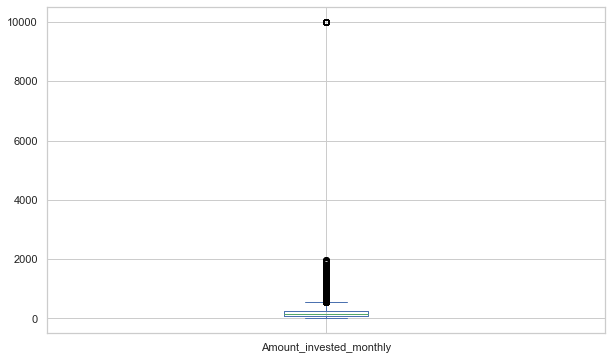

In [212]:
df_train.Amount_invested_monthly.str.replace("_", "").astype(float).plot.box()

In [213]:
df_train["Amount_invested_monthly"] = df_train.Amount_invested_monthly.str.replace("_", "").astype(float)

In [214]:
q1 = df_train.Amount_invested_monthly.quantile(0.25)
q3 = df_train.Amount_invested_monthly.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-212.2625956491557, 552.5283301990064)

In [215]:
df_train[df_train.Amount_invested_monthly > upper]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.10,3.0,Good,1303.01,26.519815,215.0,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367403555,Good,213.0,215,215.0,215
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.10,3.0,Good,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.5134106068658,Good,213.0,216,0.0,216
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.10,3.0,Good,1303.01,38.374753,220.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,Standard,213.0,220,220.0,220
28,0x162a,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,5,6,-1.01,4.0,Good,632.46,41.154317,211.0,No,16.415452,10000.000000,Low_spent_Large_value_payments,359.37491550776383,Standard,207.0,211,211.0,211
43,0x1641,CUS_0x95ee,April,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,No Credit,8,7,10.14,2.0,Good,548.20,30.201658,386.0,No,0.000000,618.202391,Low_spent_Small_value_payments,270.66810874941655,Good,383.0,386,386.0,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,0x25f7d,CUS_0x2654,April,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,9,12.39,8.0,Standard,365.66,36.412347,358.0,Yes,423.731016,714.470516,Low_spent_Medium_value_payments,319.573135,Standard,355.0,358,358.0,358
99927,0x25f81,CUS_0x2654,August,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,12.39,9.0,Standard,365.66,29.735401,362.0,Yes,423.731016,1104.416249,Low_spent_Large_value_payments,NaN,Good,355.0,362,362.0,362
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.863333,2,5,6,1,Personal Loan,8,6,6.68,2.0,Good,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,147.671372,Standard,241.0,241,0.0,241
99951,0x25fa5,CUS_0x51b3,August,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.863333,3,6,6,1,Personal Loan,8,6,6.68,5.0,Good,418.03,27.682186,248.0,No,26.778419,10000.000000,Low_spent_Large_value_payments,389.488483,Standard,241.0,248,248.0,248


In [216]:
df_train[df_train["Customer_ID"] == "CUS_0x2dbc"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,!@9#%8,1043.3159778669492,Good,213.0,213,213.0,213
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01,41.702573,214.0,No,246.992319,232.860384,High_spent_Small_value_payments,998.8692967863226,Good,213.0,214,214.0,214
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,3.0,Good,1303.01,26.519815,215.0,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367403555,Good,213.0,215,215.0,215
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.1,3.0,Good,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.5134106068658,Good,213.0,216,0.0,216
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01,31.376150,217.0,No,246.992319,430.947528,Low_spent_Large_value_payments,810.7821526659284,Good,213.0,217,217.0,217
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,39.783993,218.0,No,246.992319,257.808099,High_spent_Medium_value_payments,963.9215811205684,Good,213.0,218,218.0,218
22,0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.068624,219.0,No,246.992319,263.174163,High_spent_Small_value_payments,968.5555173846187,Standard,213.0,219,219.0,219
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.374753,220.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583180492,Standard,213.0,220,220.0,220


In [217]:
(df_train.Amount_invested_monthly == 10000 ).sum()

4305

In [218]:
(df_train.Amount_invested_monthly > upper ).sum()

10096

In [219]:
df_train[df_train["Customer_ID"] == "CUS_0x2dbc"]["Amount_invested_monthly"].median()

347.06084552098457

In [220]:
df_train[df_train["Customer_ID"] == "CUS_0x2dbc"]["Amount_invested_monthly"].mean()

2772.3025183557866

In [221]:
# 10000 olanları median ile doldurmak daha doğru olacaktır

In [222]:
df_train.Amount_invested_monthly.describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [223]:
df_train[df_train.Amount_invested_monthly != 10000].Amount_invested_monthly.describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

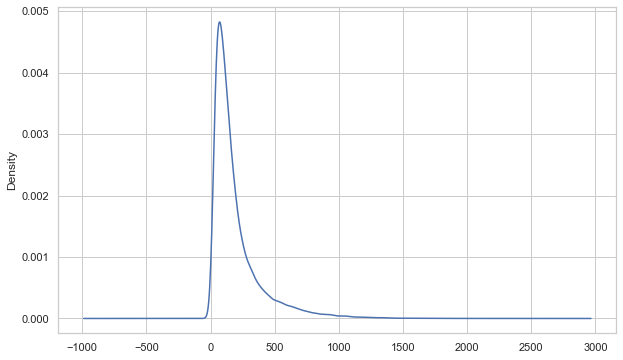

In [224]:
df_train[df_train.Amount_invested_monthly != 10000].Amount_invested_monthly.plot.density();

<AxesSubplot:ylabel='Density'>

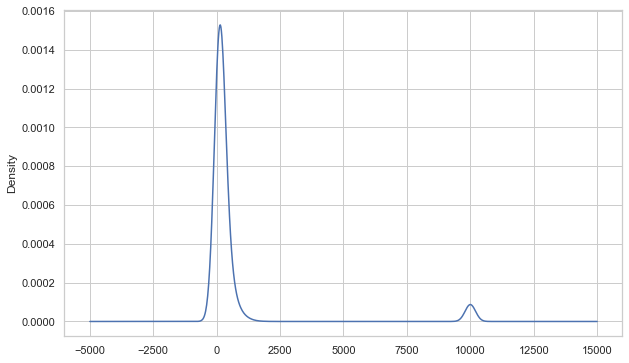

In [225]:
df_train.Amount_invested_monthly.plot.density()

In [226]:
df_train["new_Amount_invested_monthly"] = df_train.Amount_invested_monthly.replace([df_train.Amount_invested_monthly[df_train.Amount_invested_monthly == 10000]], [None])

In [227]:
df_train.groupby("Customer_ID")["new_Amount_invested_monthly"].agg(["mean", "median"]).head(50)

,mean,median
Customer_ID,,
CUS_0x1000,158.549735,145.467484
CUS_0x1009,146.679378,152.968494
CUS_0x100b,505.386526,520.541236
CUS_0x1011,311.060914,383.350845
CUS_0x1013,355.442408,320.088813
CUS_0x1015,263.812274,264.364430
CUS_0x1018,225.456923,200.294654
CUS_0x1026,340.627976,418.143023
CUS_0x102d,384.920145,408.204857


In [228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  int32  
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  float64
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int32  
 10  Num_Credit_Card              100000 non-null  int32  
 11  Interest_Rate                100000 non-null  int32  
 12  Num_of_Loan                  100000 non-null  int32  
 13  

In [229]:
# Payment_Behaviour

df_train.Payment_Behaviour.value_counts(dropna=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [230]:
df_train[df_train.Payment_Behaviour == "!@9#%8"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx,new_Amount_invested_monthly
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.4792117872438,Good,265.0,270,270.0,270,62.430172
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.10,3.0,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,!@9#%8,1043.3159778669492,Good,213.0,213,213.0,213,168.413703
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,5,5,0,No Credit,5,NaN,2.58,4.0,Standard,943.86,39.797764,368.0,Yes,0.000000,276.725394,!@9#%8,288.60552234930395,Standard,368.0,368,368.0,368,276.725394
47,0x1645,CUS_0x95ee,August,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,No Credit,8,7,10.14,2.0,Good,548.20,31.580990,390.0,No,0.000000,42.635590,!@9#%8,796.2349097481042,Good,383.0,390,390.0,390,42.63559
54,0x1650,CUS_0x284a,July,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,373.0,No,911.220179,930.391898,!@9#%8,326.24183015224526,Good,367.0,373,373.0,373,930.391898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,0x25fa1,CUS_0x51b3,April,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.863333,2,5,6,1,Personal Loan,8,6,6.68,5.0,Good,418.03,28.091458,244.0,No,26.778419,183.584149,!@9#%8,530.523765,Standard,241.0,244,244.0,244,183.584149
99980,0x25fd2,CUS_0xaf61,May,Chris Wickhamm,49,133-16-7738,Writer,37188.10,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3.0,Good,620.64,27.495263,361.0,No,84.205949,78.497727,!@9#%8,396.997157,Standard,357.0,361,361.0,361,78.497727
99982,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,50,133-16-7738,Writer,37188.10,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,13,5.38,3.0,Good,620.64,38.850680,363.0,No,84.205949,82.825572,!@9#%8,412.669312,Good,357.0,363,363.0,363,82.825572
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,16.31,9.0,Bad,3571.70,33.359987,73.0,Yes,60.964772,74.366603,!@9#%8,307.659291,Standard,68.0,73,73.0,73,74.366603


In [231]:
df_train[df_train.Customer_ID == "CUS_0xaf61"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx,new_Amount_invested_monthly
99976,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3.0,Good,620.64,39.080823,357.0,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good,357.0,357,357.0,357,223.875018
99977,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3.0,Good,620.64,32.803431,358.0,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good,357.0,358,358.0,358,70.86997
99978,0x25fd0,CUS_0xaf61,March,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",4,11,5.38,3.0,Good,620.64,24.540510,359.0,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good,357.0,359,359.0,359,125.956592
99979,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",3,12,5.38,3.0,Good,620.64,36.979007,360.0,No,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good,357.0,360,360.0,360,215.486386
99980,0x25fd2,CUS_0xaf61,May,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3.0,Good,620.64,27.495263,361.0,No,84.205949,78.497727,!@9#%8,396.997157,Standard,357.0,361,361.0,361,78.497727
99981,0x25fd3,CUS_0xaf61,June,Chris Wickhamm,50,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",5,12,5.38,3.0,Good,620.64,37.753013,362.0,No,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good,357.0,362,362.0,362,147.339908
99982,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,50,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,13,5.38,3.0,Good,620.64,38.850680,363.0,No,84.205949,82.825572,!@9#%8,412.669312,Good,357.0,363,363.0,363,82.825572
99983,0x25fd5,CUS_0xaf61,August,Chris Wickhamm,50,133-16-7738,Writer,37188.1,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,9,5.38,3.0,Good,620.64,39.300980,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good,357.0,364,364.0,364,42.935566


In [235]:
df_train.groupby("Payment_Behaviour")[["Outstanding_Debt"]].describe()

Outstanding_Debt                            \
                                            count         mean          std   
Payment_Behaviour                                                             
!@9#%8                                     7600.0  1434.367946  1164.022117   
High_spent_Large_value_payments           13721.0  1226.901759  1049.784085   
High_spent_Medium_value_payments          17540.0  1353.076665  1114.280232   
High_spent_Small_value_payments           11340.0  1423.532309  1159.501682   
Low_spent_Large_value_payments            10425.0  1404.040446  1143.483652   
Low_spent_Medium_value_payments           13861.0  1415.020101  1156.198042   
Low_spent_Small_value_payments            25513.0  1597.616346  1211.413105   

                                                                                
                                   min       25%       50%        75%      max  
Payment_Behaviour                                                               
!@9#%8                            0.23  565.2200  1170.965  1961.4000  4998.07  
High_spent_Large_value_payments   0.23  483.4000  1007.840  1452.4300  4992.25  
High_spent_Medium_value_payments  0.23  537.7225  1102.535  1769.9825  4998.07  
High_spent_Small_value_payments   0.34  562.3400  1167.600  1931.8675  4998.07  
Low_spent_Large_value_payments    0.23  559.1900  1141.680  1896.0900  4997.10  
Low_spent_Medium_value_payments   0.23  557.7800  1158.750  1909.4500  4998.07  
Low_spent_Small_value_payments    0.23  672.2700  1311.730  2302.2800  4997.10

In [236]:
df_train.groupby("Payment_Behaviour")[["Total_EMI_per_month"]].describe()

Total_EMI_per_month               \
                                               count         mean   
Payment_Behaviour                                                   
!@9#%8                                        7600.0  1332.233482   
High_spent_Large_value_payments              13721.0  1528.457929   
High_spent_Medium_value_payments             17540.0  1434.074952   
High_spent_Small_value_payments              11340.0  1331.096371   
Low_spent_Large_value_payments               10425.0  1372.693496   
Low_spent_Medium_value_payments              13861.0  1452.443518   
Low_spent_Small_value_payments               25513.0  1353.189321   

                                                                           \
                                          std  min        25%         50%   
Payment_Behaviour                                                           
!@9#%8                            8076.583535  0.0  30.882707   70.603941   
High_spent_Large_value_payments   8597.305912  0.0  44.375759  109.362477   
High_spent_Medium_value_payments  8267.751945  0.0  38.302175   88.700312   
High_spent_Small_value_payments   8031.012816  0.0  32.163960   72.345751   
Low_spent_Large_value_payments    8266.002653  0.0  29.620106   65.374378   
Low_spent_Medium_value_payments   8477.971965  0.0  28.611776   67.115332   
Low_spent_Small_value_payments    8282.397523  0.0  25.048554   51.662433   

                                                       
                                         75%      max  
Payment_Behaviour                                      
!@9#%8                            163.205106  81870.0  
High_spent_Large_value_payments   212.508095  82193.0  
High_spent_Medium_value_payments  184.809017  82163.0  
High_spent_Small_value_payments   159.196753  82236.0  
Low_spent_Large_value_payments    147.679554  82256.0  
Low_spent_Medium_value_payments   165.296308  82204.0  
Low_spent_Small_value_payments    100.853208  82331.0

In [239]:
df_train.groupby("Payment_Behaviour")[["Amount_invested_monthly"]].describe()

Amount_invested_monthly              \
                                                   count        mean   
Payment_Behaviour                                                      
!@9#%8                                            7253.0  637.746150   
High_spent_Large_value_payments                  13076.0  553.031199   
High_spent_Medium_value_payments                 16766.0  563.003483   
High_spent_Small_value_payments                  10803.0  623.254882   
Low_spent_Large_value_payments                    9948.0  673.435613   
Low_spent_Medium_value_payments                  13253.0  724.833187   
Low_spent_Small_value_payments                   24422.0  677.726134   

                                                                     \
                                          std        min        25%   
Payment_Behaviour                                                     
!@9#%8                            2043.906725   0.000000  74.049538   
High_spent_Large_value_payments   2072.843889   0.000000  47.707185   
High_spent_Medium_value_payments  2030.007959   0.000000  61.287993   
High_spent_Small_value_payments   2049.121036   0.000000  75.486681   
Low_spent_Large_value_payments    2037.576063   0.000000  93.399125   
Low_spent_Medium_value_payments   2019.536472  10.364065  91.115784   
Low_spent_Small_value_payments    2045.751330  10.580562  94.892622   

                                                                   
                                         50%         75%      max  
Payment_Behaviour                                                  
!@9#%8                            136.569873  263.956502  10000.0  
High_spent_Large_value_payments    86.840091  147.325503  10000.0  
High_spent_Medium_value_payments  105.976094  182.175506  10000.0  
High_spent_Small_value_payments   140.436095  254.439908  10000.0  
Low_spent_Large_value_payments    172.277444  339.473856  10000.0  
Low_spent_Medium_value_payments   205.371738  478.520295  10000.0  
Low_spent_Small_value_payments    162.386056  321.340566  10000.0

In [243]:
df_train.Payment_Behaviour.replace("!@9#%8", np.nan).isnull().sum()/df_train.shape[0]

0.076

In [255]:
df_train.groupby("Payment_Behaviour")[["Monthly_Balance"]].describe()

Monthly_Balance                             \
                                           count unique                 top   
Payment_Behaviour                                                             
!@9#%8                                      7505   7505   340.4792117872438   
High_spent_Large_value_payments            13720  13720   484.5912142650067   
High_spent_Medium_value_payments           17540  17540  341.48923103222177   
High_spent_Small_value_payments            11332  11332  312.49408867943663   
Low_spent_Large_value_payments             10382  10382  284.62916249607184   
Low_spent_Medium_value_payments            13681  13681   331.2098628537912   
Low_spent_Small_value_payments             24631  24631  223.45130972736786   

                                       
                                 freq  
Payment_Behaviour                      
!@9#%8                              1  
High_spent_Large_value_payments     1  
High_spent_Medium_value_payments    1  
High_spent_Small_value_payments     1  
Low_spent_Large_value_payments      1  
Low_spent_Medium_value_payments     1  
Low_spent_Small_value_payments      1

In [244]:
# Payment_Behaviour kolonu düşülebilir. Payment_Behaviour'ı belirleyen diğer faktörler df'te mevcut zaten.
df_train.groupby("Payment_Behaviour")[["Credit_Score"]].describe()

Credit_Score                        
                                        count unique       top   freq
Payment_Behaviour                                                    
!@9#%8                                   7600      3  Standard   3992
High_spent_Large_value_payments         13721      3  Standard   7570
High_spent_Medium_value_payments        17540      3  Standard   9577
High_spent_Small_value_payments         11340      3  Standard   6138
Low_spent_Large_value_payments          10425      3  Standard   5614
Low_spent_Medium_value_payments         13861      3  Standard   7168
Low_spent_Small_value_payments          25513      3  Standard  13115

In [245]:
# Monthly_Balance

df_train.Monthly_Balance.value_counts(dropna=False)

NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.6736955618808                      1
Name: Monthly_Balance, Length: 98793, dtype: int64

In [249]:
df_train.Monthly_Balance.replace("__-333333333333333333333333333__", np.nan, inplace=True)

In [250]:
df_train.Monthly_Balance.isnull().sum()

1209

In [259]:
df_train["Monthly_Balance"] = df_train.Monthly_Balance.astype(float)

In [260]:
df_train.groupby("Customer_ID").Monthly_Balance.describe()

,count,mean,std,min,25%,50%,75%,max
Customer_ID,,,,,,,,
CUS_0x1000,8.0,335.375341,64.587023,251.077916,292.611430,340.080534,379.744707,419.765167
CUS_0x1009,8.0,428.743155,55.104418,335.461554,404.888930,417.869641,458.343431,508.012341
CUS_0x100b,8.0,781.229776,206.170607,486.895055,589.262788,824.355725,964.355820,1020.690652
CUS_0x1011,8.0,332.642837,191.612251,126.455228,173.356768,263.677975,536.420649,576.226143
CUS_0x1013,8.0,472.781009,181.493962,106.700098,442.737745,513.134603,577.517201,659.096056
...,...,...,...,...,...,...,...,...
CUS_0xff3,8.0,271.671562,31.399119,221.890609,256.096610,280.587085,295.105445,301.647512
CUS_0xff4,8.0,259.981173,90.434813,118.257515,205.314159,303.249291,323.568273,338.526114
CUS_0xff6,7.0,667.322417,263.185331,157.308427,589.074591,734.676144,832.295205,936.532760


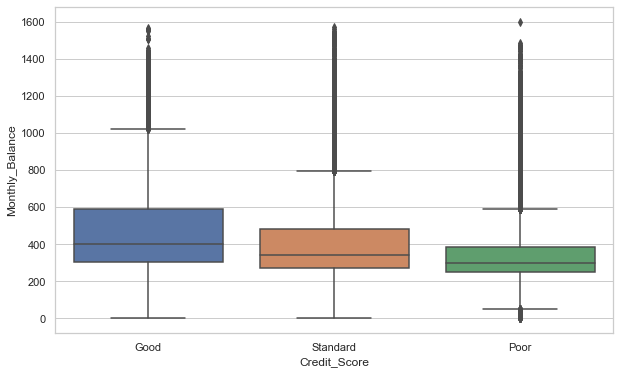

In [264]:
sns.boxplot(x="Credit_Score", y="Monthly_Balance", data=df_train); # before filling null values

In [266]:
df_train["Monthly_Balance"] = df_train.groupby("Customer_ID").Monthly_Balance.apply(lambda x : x.fillna(x.mean()))

In [254]:
df_train[df_train.Customer_ID == "CUS_0xff6"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Final_Age,History_Age_with_last_def,History_Age_with_last_defx,new_Amount_invested_monthly
39032,0xfab6,CUS_0xff6,January,Shieldsb,18,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,4,10.4,2.0,Good,338.3,42.501107,292.0,No,126.638453,361.418069,High_spent_Medium_value_payments,734.6761442936375,Standard,292.0,292,292.0,292,361.418069
39033,0xfab7,CUS_0xff6,February,Shieldsb,18,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,4,10.4,2.0,Good,338.3,40.277927,293.0,No,126.638453,519.950718,High_spent_Small_value_payments,586.1434951395802,Standard,292.0,293,293.0,293,519.950718
39034,0xfab8,CUS_0xff6,March,Shieldsb,18,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,4,10.4,2.0,Good,338.3,28.432276,294.0,No,126.638453,10000.000000,!@9#%8,936.5327602814987,Standard,292.0,294,294.0,294,None
39035,0xfab9,CUS_0xff6,April,Shieldsb,19,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,3,10.4,2.0,Good,338.3,37.543969,295.0,No,126.638453,350.543513,High_spent_Small_value_payments,755.5507001851421,Standard,292.0,295,295.0,295,350.543513
39036,0xfaba,CUS_0xff6,May,Shieldsb,19,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",-4,4,10.4,2.0,Good,338.3,35.594374,296.0,No,126.638453,NaN,High_spent_Large_value_payments,909.0397093252233,Standard,292.0,296,296.0,296,NaN
39037,0xfabb,CUS_0xff6,June,Shieldsb,19,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,2,16.4,2.0,Good,338.3,25.211305,297.0,No,126.638453,978.785786,Low_spent_Small_value_payments,157.30842686510968,Standard,292.0,297,297.0,297,978.785786
39038,0xfabc,CUS_0xff6,July,Shieldsb,19,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,NaN,16.4,2.0,Good,338.3,23.631611,298.0,No,126.638453,1186.582604,Low_spent_Small_value_payments,NaN,Good,292.0,298,298.0,298,1186.582604
39039,0xfabd,CUS_0xff6,August,Shieldsb,19,541-92-8371,Doctor,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",-3,7,10.4,2.0,Good,338.3,32.871853,299.0,No,126.638453,534.088527,Low_spent_Medium_value_payments,592.0056861539196,Good,292.0,299,299.0,299,534.088527


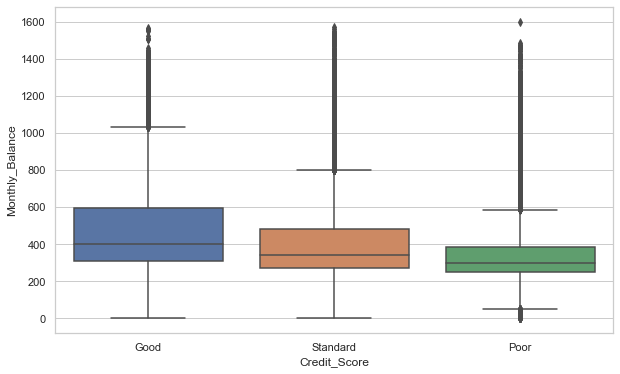

In [267]:
sns.boxplot(x="Credit_Score", y="Monthly_Balance", data=df_train); # after filling null values with mean by grouping customer

In [268]:
df_train.groupby("Customer_ID").Monthly_Balance.describe() # after filling null values

,count,mean,std,min,25%,50%,75%,max
Customer_ID,,,,,,,,
CUS_0x1000,8.0,335.375341,64.587023,251.077916,292.611430,340.080534,379.744707,419.765167
CUS_0x1009,8.0,428.743155,55.104418,335.461554,404.888930,417.869641,458.343431,508.012341
CUS_0x100b,8.0,781.229776,206.170607,486.895055,589.262788,824.355725,964.355820,1020.690652
CUS_0x1011,8.0,332.642837,191.612251,126.455228,173.356768,263.677975,536.420649,576.226143
CUS_0x1013,8.0,472.781009,181.493962,106.700098,442.737745,513.134603,577.517201,659.096056
...,...,...,...,...,...,...,...,...
CUS_0xff3,8.0,271.671562,31.399119,221.890609,256.096610,280.587085,295.105445,301.647512
CUS_0xff4,8.0,259.981173,90.434813,118.257515,205.314159,303.249291,323.568273,338.526114
CUS_0xff6,8.0,667.322417,243.662269,157.308427,590.540138,700.999281,793.922952,936.532760


In [257]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  int32  
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  float64
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int32  
 10  Num_Credit_Card              100000 non-null  int32  
 11  Interest_Rate                100000 non-null  int32  
 12  Num_of_Loan                  100000 non-null  int32  
 13  

In [256]:
df_train.groupby("Customer_ID").Monthly_Balance.mean()

TypeError: Could not convert 252.9247932365056311.542509588218368.61855747932816419.7651674292397305.8403087451377372.87267565273436251.0779157891069400.36080052211616 to numeric